In [108]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore
import warnings 
warnings.filterwarnings( "ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from IPython.display import Image
from sklearn import tree
from os import system
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [109]:
# Download the dataset from "https://www.kaggle.com/datasets/rakeshswaminathan/churn-data/data" named "Customer Churn Data.xlsx"


import pandas as pd
import os

DATASET_PATH = 'C:\\Users\\Sai\\Desktop\\Capstone_Project\\Customer Churn Data.xlsx'

def load_dataset_data(dataset_path=DATASET_PATH): 
    return pd.read_excel(dataset_path)

In [110]:
df = pd.read_excel('Customer Churn Data.xlsx', sheet_name='Data for DSBA')

In [111]:
df.head().T

0             1             2           3  \
AccountID                     20000         20001         20002       20003   
Churn                             1             1             1           1   
Tenure                            4             0             0           0   
City_Tier                       3.0           1.0           1.0         3.0   
CC_Contacted_LY                 6.0           8.0          30.0        15.0   
Payment                  Debit Card           UPI    Debit Card  Debit Card   
Gender                       Female          Male          Male        Male   
Service_Score                   3.0           3.0           2.0         2.0   
Account_user_count                3             4             4           4   
account_segment               Super  Regular Plus  Regular Plus       Super   
CC_Agent_Score                  2.0           3.0           3.0         5.0   
Marital_Status               Single        Single        Single      Single   
rev_per_month                     9             7             6           8   
Complain_ly                     1.0           1.0           1.0         0.0   
rev_growth_yoy                   11            15            14          23   
coupon_used_for_payment           1             0             0           0   
Day_Since_CC_connect              5             0             3           3   
cashback                     159.93         120.9           NaN      134.07   
Login_device                 Mobile        Mobile        Mobile      Mobile   

                                    4  
AccountID                       20004  
Churn                               1  
Tenure                              0  
City_Tier                         1.0  
CC_Contacted_LY                  12.0  
Payment                   Credit Card  
Gender                           Male  
Service_Score                     2.0  
Account_user_count                  3  
account_segment          Regular Plus  
CC_Agent_Score                    5.0  
Marital_Status                 Single  
rev_per_month                       3  
Complain_ly                       0.0  
rev_growth_yoy                     11  
coupon_used_for_payment             1  
Day_Since_CC_connect                3  
cashback                        129.6  
Login_device                   Mobile

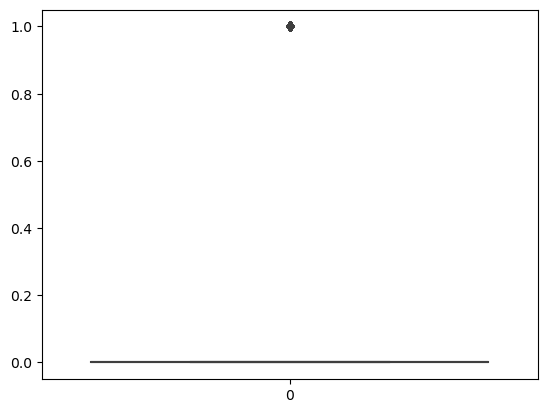

In [112]:
a= sns.boxplot(df['Churn'])

In [113]:
df.shape

(11260, 19)

In [114]:
df['Payment'].value_counts

<bound method IndexOpsMixin.value_counts of 0         Debit Card
1                UPI
2         Debit Card
3         Debit Card
4        Credit Card
            ...     
11255    Credit Card
11256    Credit Card
11257     Debit Card
11258    Credit Card
11259    Credit Card
Name: Payment, Length: 11260, dtype: object>

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [116]:
df.describe()

AccountID         Churn     City_Tier  CC_Contacted_LY  \
count  11260.00000  11260.000000  11148.000000     11158.000000   
mean   25629.50000      0.168384      1.653929        17.867091   
std     3250.62635      0.374223      0.915015         8.853269   
min    20000.00000      0.000000      1.000000         4.000000   
25%    22814.75000      0.000000      1.000000        11.000000   
50%    25629.50000      0.000000      1.000000        16.000000   
75%    28444.25000      0.000000      3.000000        23.000000   
max    31259.00000      1.000000      3.000000       132.000000   

       Service_Score  CC_Agent_Score   Complain_ly  
count   11162.000000    11144.000000  10903.000000  
mean        2.902526        3.066493      0.285334  
std         0.725584        1.379772      0.451594  
min         0.000000        1.000000      0.000000  
25%         2.000000        2.000000      0.000000  
50%         3.000000        3.000000      0.000000  
75%         3.000000        4.000000      1.000000  
max         5.000000        5.000000      1.000000

In [117]:
df.isnull().sum()

AccountID                    0
Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [118]:
df.duplicated().sum()

0

In [119]:
df.columns

Index(['AccountID', 'Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY',
       'Payment', 'Gender', 'Service_Score', 'Account_user_count',
       'account_segment', 'CC_Agent_Score', 'Marital_Status', 'rev_per_month',
       'Complain_ly', 'rev_growth_yoy', 'coupon_used_for_payment',
       'Day_Since_CC_connect', 'cashback', 'Login_device'],
      dtype='object')

In [120]:
df1= df.copy()

In [121]:
df1.drop(['AccountID'],axis=1, inplace=True)

In [122]:
df1.head().T

0             1             2           3  \
Churn                             1             1             1           1   
Tenure                            4             0             0           0   
City_Tier                       3.0           1.0           1.0         3.0   
CC_Contacted_LY                 6.0           8.0          30.0        15.0   
Payment                  Debit Card           UPI    Debit Card  Debit Card   
Gender                       Female          Male          Male        Male   
Service_Score                   3.0           3.0           2.0         2.0   
Account_user_count                3             4             4           4   
account_segment               Super  Regular Plus  Regular Plus       Super   
CC_Agent_Score                  2.0           3.0           3.0         5.0   
Marital_Status               Single        Single        Single      Single   
rev_per_month                     9             7             6           8   
Complain_ly                     1.0           1.0           1.0         0.0   
rev_growth_yoy                   11            15            14          23   
coupon_used_for_payment           1             0             0           0   
Day_Since_CC_connect              5             0             3           3   
cashback                     159.93         120.9           NaN      134.07   
Login_device                 Mobile        Mobile        Mobile      Mobile   

                                    4  
Churn                               1  
Tenure                              0  
City_Tier                         1.0  
CC_Contacted_LY                  12.0  
Payment                   Credit Card  
Gender                           Male  
Service_Score                     2.0  
Account_user_count                  3  
account_segment          Regular Plus  
CC_Agent_Score                    5.0  
Marital_Status                 Single  
rev_per_month                       3  
Complain_ly                       0.0  
rev_growth_yoy                     11  
coupon_used_for_payment             1  
Day_Since_CC_connect                3  
cashback                        129.6  
Login_device                   Mobile

In [123]:
for i in df1.columns:
    if df1[i].dtypes == 'object':
        print(i)
        print()
        print('the values are:') 
        print(df1[i].value_counts())
        print()
        print()

Tenure

the values are:
1     1351
0     1231
8      519
9      496
7      450
10     423
3      410
5      403
4      403
11     388
6      363
12     360
13     359
2      354
14     345
15     311
16     291
19     273
18     253
20     217
17     215
21     170
23     169
22     151
24     147
28     137
30     137
27     131
99     131
26     122
#      116
25     114
29     114
31      96
50       2
60       2
51       2
61       2
Name: Tenure, dtype: int64


Payment

the values are:
Debit Card          4587
Credit Card         3511
E wallet            1217
Cash on Delivery    1014
UPI                  822
Name: Payment, dtype: int64


Gender

the values are:
Male      6328
Female    4178
M          376
F          270
Name: Gender, dtype: int64


Account_user_count

the values are:
4    4569
3    3261
5    1699
2     526
1     446
@     332
6     315
Name: Account_user_count, dtype: int64


account_segment

the values are:
Super           4062
Regular Plus    3862
HNI           

Text(0, 0.5, 'Values')

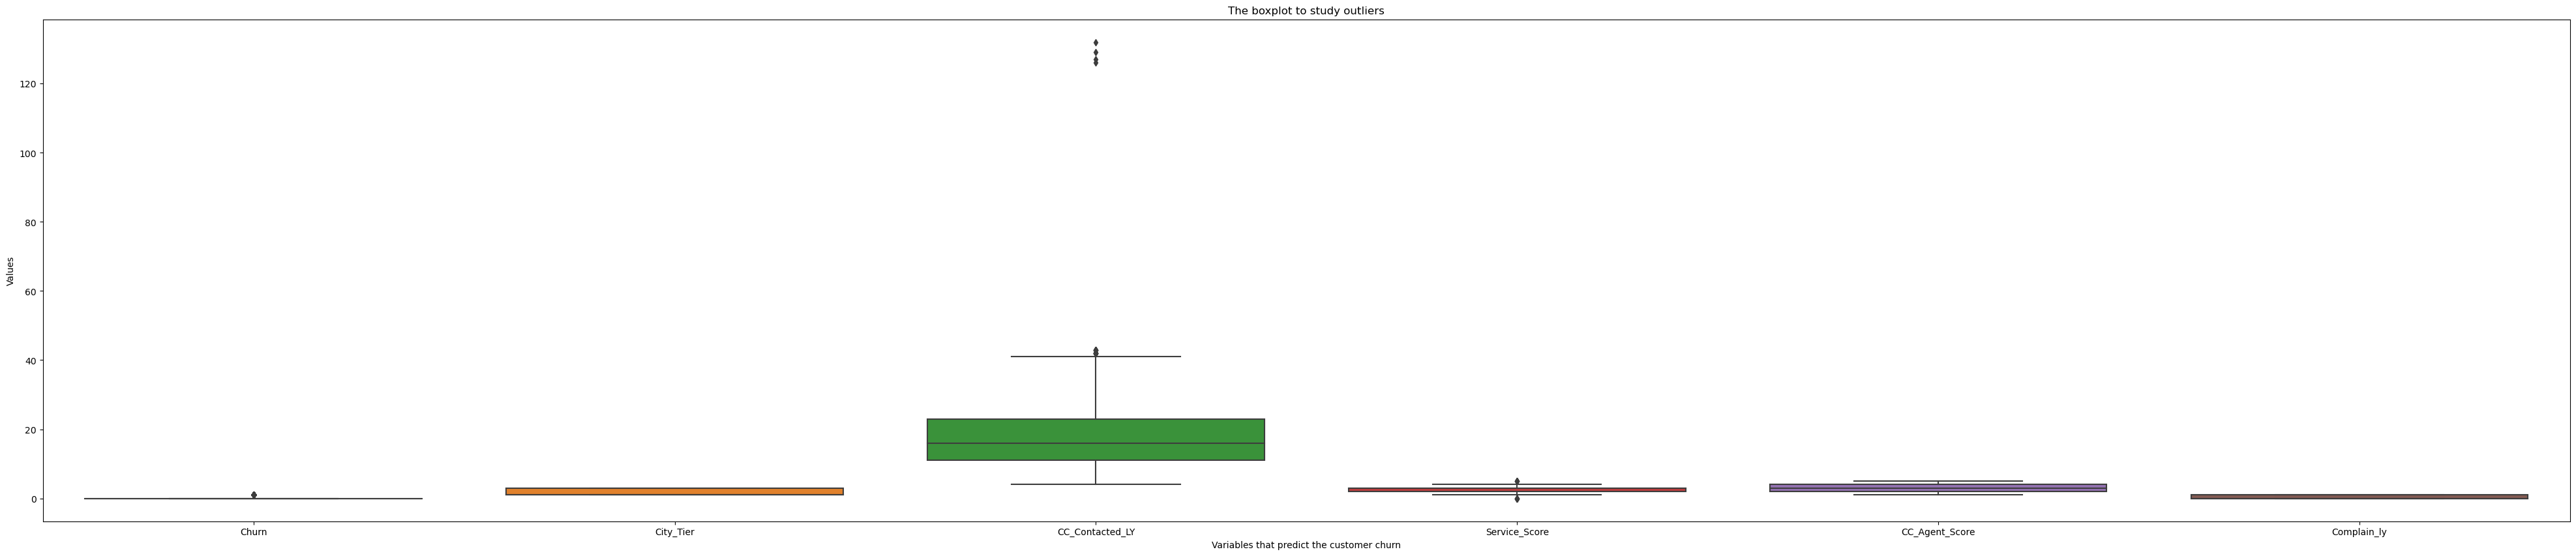

In [124]:
plt.figure(figsize=(50,10))
sns.boxplot(data=df1)
plt.title('The boxplot to study outliers')
plt.xlabel('Variables that predict the customer churn')
plt.ylabel('Values')

In [125]:
df1.Churn = df1["Churn"].astype('object')
df1.City_Tier = df1["City_Tier"].astype('object')

In [126]:
df1.Tenure=df1["Tenure"].replace(to_replace="#",value=np.nan)
df1.Tenure=df1["Tenure"].astype(float)

In [127]:
df1["Gender"]=df1["Gender"].replace("F","Female")
df1["Gender"]=df1["Gender"].replace("M","Male")

In [128]:
df1.Account_user_count=df1["Account_user_count"].replace(to_replace="@",value=np.nan)
df1.Account_user_count=df1["Account_user_count"].astype(float)

In [129]:
df1.rev_per_month=df1["rev_per_month"].replace(to_replace="+",value=np.nan)
df1.rev_per_month=df1["rev_per_month"].astype(float)

In [130]:
df1.rev_growth_yoy=df1["rev_growth_yoy"].replace(to_replace="$",value=np.nan)
df1.rev_growth_yoy=df1["rev_growth_yoy"].astype(float)

In [131]:
df1.coupon_used_for_payment=df1["coupon_used_for_payment"].replace(to_replace="*",value=np.nan)
df1.coupon_used_for_payment=df1["coupon_used_for_payment"].replace(to_replace="$",value=np.nan)
df1.coupon_used_for_payment=df1["coupon_used_for_payment"].replace(to_replace="#",value=np.nan)

In [132]:
df1.Day_Since_CC_connect=df1["Day_Since_CC_connect"].replace(to_replace="$",value=np.nan)
df1.Day_Since_CC_connect=df1["Day_Since_CC_connect"].astype(float)

In [133]:
df1.cashback=df1["cashback"].replace(to_replace="$",value=np.nan)
df1.cashback=df1["cashback"].astype(float)

In [134]:
df1.Login_device=df1["Login_device"].replace(to_replace="&&&&",value=np.nan)

In [135]:
df1.Login_device.value_counts()

Mobile      7482
Computer    3018
Name: Login_device, dtype: int64

In [136]:
df1.Day_Since_CC_connect.value_counts()

3.0     1816
2.0     1574
1.0     1256
8.0     1169
0.0      964
7.0      911
4.0      893
9.0      622
5.0      479
10.0     339
6.0      229
11.0     183
12.0     146
13.0     117
14.0      74
15.0      37
17.0      34
16.0      26
18.0      26
30.0       2
31.0       2
47.0       2
46.0       1
Name: Day_Since_CC_connect, dtype: int64

In [137]:
df1.coupon_used_for_payment.value_counts()

1.0     4373
2.0     2656
0.0     2150
3.0      698
4.0      424
5.0      284
6.0      234
7.0      184
8.0       88
9.0       34
10.0      34
11.0      30
12.0      26
13.0      22
14.0      12
15.0       4
16.0       4
Name: coupon_used_for_payment, dtype: int64

In [138]:
df1.rev_growth_yoy.value_counts()

14.0    1524
13.0    1427
15.0    1283
12.0    1210
16.0     949
18.0     708
17.0     704
19.0     619
20.0     562
11.0     523
21.0     433
22.0     403
23.0     345
24.0     229
25.0     188
26.0      98
27.0      35
28.0      14
4.0        3
Name: rev_growth_yoy, dtype: int64

In [139]:
df1.rev_per_month.value_counts()

3.0      1746
2.0      1585
5.0      1337
4.0      1218
6.0      1085
7.0       754
8.0       643
9.0       564
10.0      413
1.0       402
11.0      278
12.0      166
13.0       93
14.0       48
15.0       24
102.0       8
124.0       5
107.0       5
123.0       5
140.0       4
118.0       4
129.0       4
133.0       4
136.0       4
117.0       3
108.0       3
101.0       3
116.0       3
110.0       3
137.0       3
119.0       3
115.0       3
138.0       3
130.0       3
126.0       3
113.0       3
127.0       3
19.0        2
139.0       2
120.0       2
131.0       2
22.0        2
125.0       2
121.0       2
105.0       2
114.0       2
134.0       2
20.0        1
23.0        1
122.0       1
104.0       1
21.0        1
25.0        1
135.0       1
111.0       1
109.0       1
100.0       1
103.0       1
Name: rev_per_month, dtype: int64

In [140]:
df1.Account_user_count.value_counts()

4.0    4569
3.0    3261
5.0    1699
2.0     526
1.0     446
6.0     315
Name: Account_user_count, dtype: int64

In [141]:
df1.Gender.value_counts()

Male      6704
Female    4448
Name: Gender, dtype: int64

In [142]:
df1.isnull().sum()

Churn                        0
Tenure                     218
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         444
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              791
Complain_ly                357
rev_growth_yoy               3
coupon_used_for_payment      3
Day_Since_CC_connect       358
cashback                   473
Login_device               760
dtype: int64

In [143]:
df1.describe().T

count        mean         std  min     25%     50%  \
Tenure                   11042.0   11.025086   12.879782  0.0    2.00    9.00   
CC_Contacted_LY          11158.0   17.867091    8.853269  4.0   11.00   16.00   
Service_Score            11162.0    2.902526    0.725584  0.0    2.00    3.00   
Account_user_count       10816.0    3.692862    1.022976  1.0    3.00    4.00   
CC_Agent_Score           11144.0    3.066493    1.379772  1.0    2.00    3.00   
rev_per_month            10469.0    6.362594   11.909686  1.0    3.00    5.00   
Complain_ly              10903.0    0.285334    0.451594  0.0    0.00    0.00   
rev_growth_yoy           11257.0   16.193391    3.757721  4.0   13.00   15.00   
coupon_used_for_payment  11257.0    1.790619    1.969551  0.0    1.00    1.00   
Day_Since_CC_connect     10902.0    4.633187    3.697637  0.0    2.00    3.00   
cashback                 10787.0  196.236370  178.660514  0.0  147.21  165.25   

                            75%     max  
Tenure                    16.00    99.0  
CC_Contacted_LY           23.00   132.0  
Service_Score              3.00     5.0  
Account_user_count         4.00     6.0  
CC_Agent_Score             4.00     5.0  
rev_per_month              7.00   140.0  
Complain_ly                1.00     1.0  
rev_growth_yoy            19.00    28.0  
coupon_used_for_payment    2.00    16.0  
Day_Since_CC_connect       8.00    47.0  
cashback                 200.01  1997.0

In [144]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  object 
 1   Tenure                   11042 non-null  float64
 2   City_Tier                11148 non-null  object 
 3   CC_Contacted_LY          11158 non-null  float64
 4   Payment                  11151 non-null  object 
 5   Gender                   11152 non-null  object 
 6   Service_Score            11162 non-null  float64
 7   Account_user_count       10816 non-null  float64
 8   account_segment          11163 non-null  object 
 9   CC_Agent_Score           11144 non-null  float64
 10  Marital_Status           11048 non-null  object 
 11  rev_per_month            10469 non-null  float64
 12  Complain_ly              10903 non-null  float64
 13  rev_growth_yoy           11257 non-null  float64
 14  coupon_used_for_paymen

In [145]:
df1.isnull().sum()

Churn                        0
Tenure                     218
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         444
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              791
Complain_ly                357
rev_growth_yoy               3
coupon_used_for_payment      3
Day_Since_CC_connect       358
cashback                   473
Login_device               760
dtype: int64

In [146]:
df1["Tenure"]=df1["Tenure"].replace(np.nan,df1["Tenure"].median())
df1["Account_user_count"]=df1["Account_user_count"].replace(np.nan,df1["Account_user_count"].median())
df1["CC_Contacted_LY"]=df1["CC_Contacted_LY"].replace(np.nan,df1["CC_Contacted_LY"].median())
df1["Service_Score"]=df1["Service_Score"].replace(np.nan,df1["Service_Score"].median())
df1["CC_Agent_Score"]=df1["CC_Agent_Score"].replace(np.nan,df1["CC_Agent_Score"].median())
df1["rev_per_month"]=df1["rev_per_month"].replace(np.nan,df1["rev_per_month"].median())
df1["Complain_ly"]=df1["Complain_ly"].replace(np.nan,df1["Complain_ly"].median())
df1["rev_growth_yoy"]=df1["rev_growth_yoy"].replace(np.nan,df1["rev_growth_yoy"].median())
df1["coupon_used_for_payment"]=df1["coupon_used_for_payment"].replace(np.nan,df1["coupon_used_for_payment"].median())
df1["Day_Since_CC_connect"]=df1["Day_Since_CC_connect"].replace(np.nan,df1["Day_Since_CC_connect"].median())
df1["cashback"]=df1["cashback"].replace(np.nan,df1["cashback"].median())

In [147]:
df1.isnull().sum()

Churn                        0
Tenure                       0
City_Tier                  112
CC_Contacted_LY              0
Payment                    109
Gender                     108
Service_Score                0
Account_user_count           0
account_segment             97
CC_Agent_Score               0
Marital_Status             212
rev_per_month                0
Complain_ly                  0
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect         0
cashback                     0
Login_device               760
dtype: int64

In [148]:
df1['City_Tier'].mode()

0    1.0
Name: City_Tier, dtype: object

In [149]:
df1['Payment'].mode()

0    Debit Card
Name: Payment, dtype: object

In [150]:
df1['Gender'].mode()

0    Male
Name: Gender, dtype: object

In [151]:
df1['account_segment'].mode()

0    Super
Name: account_segment, dtype: object

In [152]:
df1['Marital_Status'].mode()

0    Married
Name: Marital_Status, dtype: object

In [153]:
df1['Login_device'].mode()

0    Mobile
Name: Login_device, dtype: object

In [154]:
df1['City_Tier']=df1['City_Tier'].fillna(1.0)
df1['Payment']=df1['Payment'].fillna('Debit Card')
df1['Gender']=df1['Gender'].fillna('Male')
df1['account_segment']=df1['account_segment'].fillna('Super')
df1['Marital_Status']=df1['Marital_Status'].fillna('Married')
df1['Login_device']=df1['Login_device'].fillna('Mobile')

In [155]:
df1.isnull().sum()

Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

In [156]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  object 
 1   Tenure                   11260 non-null  float64
 2   City_Tier                11260 non-null  float64
 3   CC_Contacted_LY          11260 non-null  float64
 4   Payment                  11260 non-null  object 
 5   Gender                   11260 non-null  object 
 6   Service_Score            11260 non-null  float64
 7   Account_user_count       11260 non-null  float64
 8   account_segment          11260 non-null  object 
 9   CC_Agent_Score           11260 non-null  float64
 10  Marital_Status           11260 non-null  object 
 11  rev_per_month            11260 non-null  float64
 12  Complain_ly              11260 non-null  float64
 13  rev_growth_yoy           11260 non-null  float64
 14  coupon_used_for_paymen

Text(0, 0.5, 'Values')

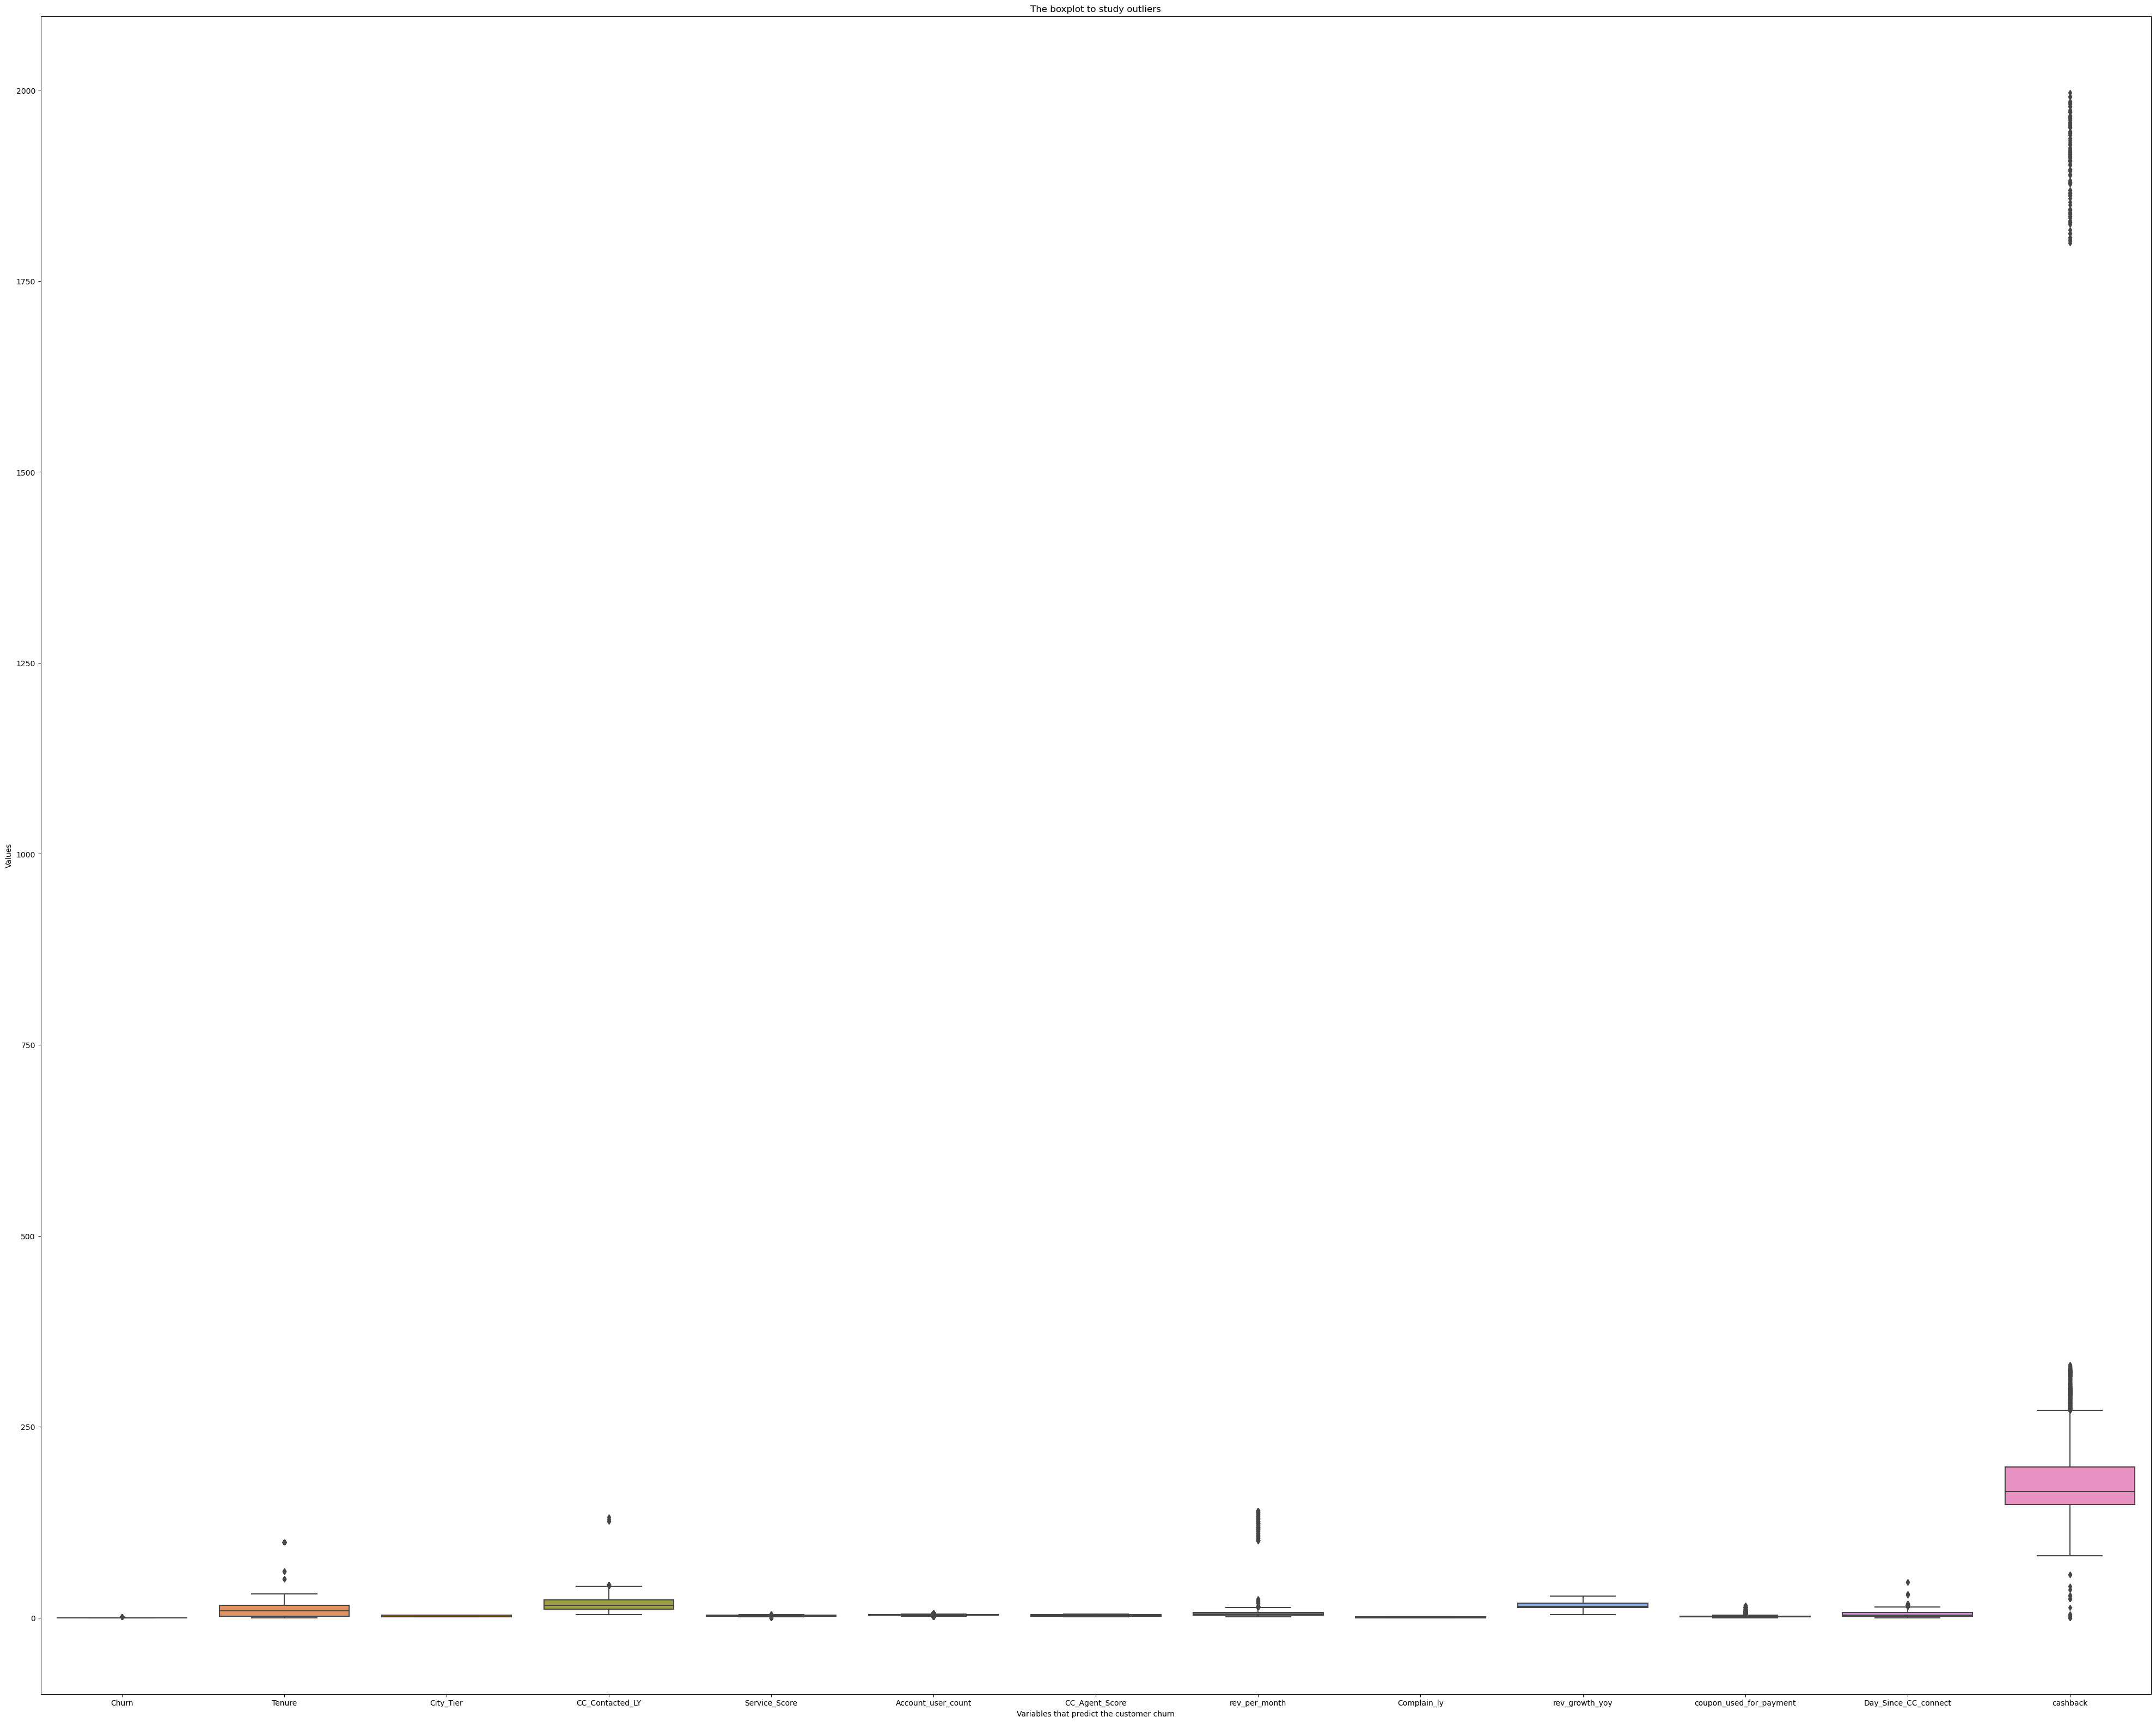

In [157]:
plt.figure(figsize=(50,40))
sns.boxplot(data=df1)
plt.title('The boxplot to study outliers')
plt.xlabel('Variables that predict the customer churn')
plt.ylabel('Values')

In [158]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lr= Q1-(1.5 * IQR)
    ur= Q3+(1.5 * IQR)
    return lr, ur

In [159]:
df1.columns

Index(['Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY', 'Payment', 'Gender',
       'Service_Score', 'Account_user_count', 'account_segment',
       'CC_Agent_Score', 'Marital_Status', 'rev_per_month', 'Complain_ly',
       'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect',
       'cashback', 'Login_device'],
      dtype='object')

In [160]:
for column in df1.columns:
    if df1[column].dtype != 'object': 
        lr,ur=remove_outlier(df1[column])
        df1[column]=np.where(df1[column]>ur,ur,df1[column])
        df1[column]=np.where(df1[column]<lr,lr,df1[column])

Text(0, 0.5, 'Values')

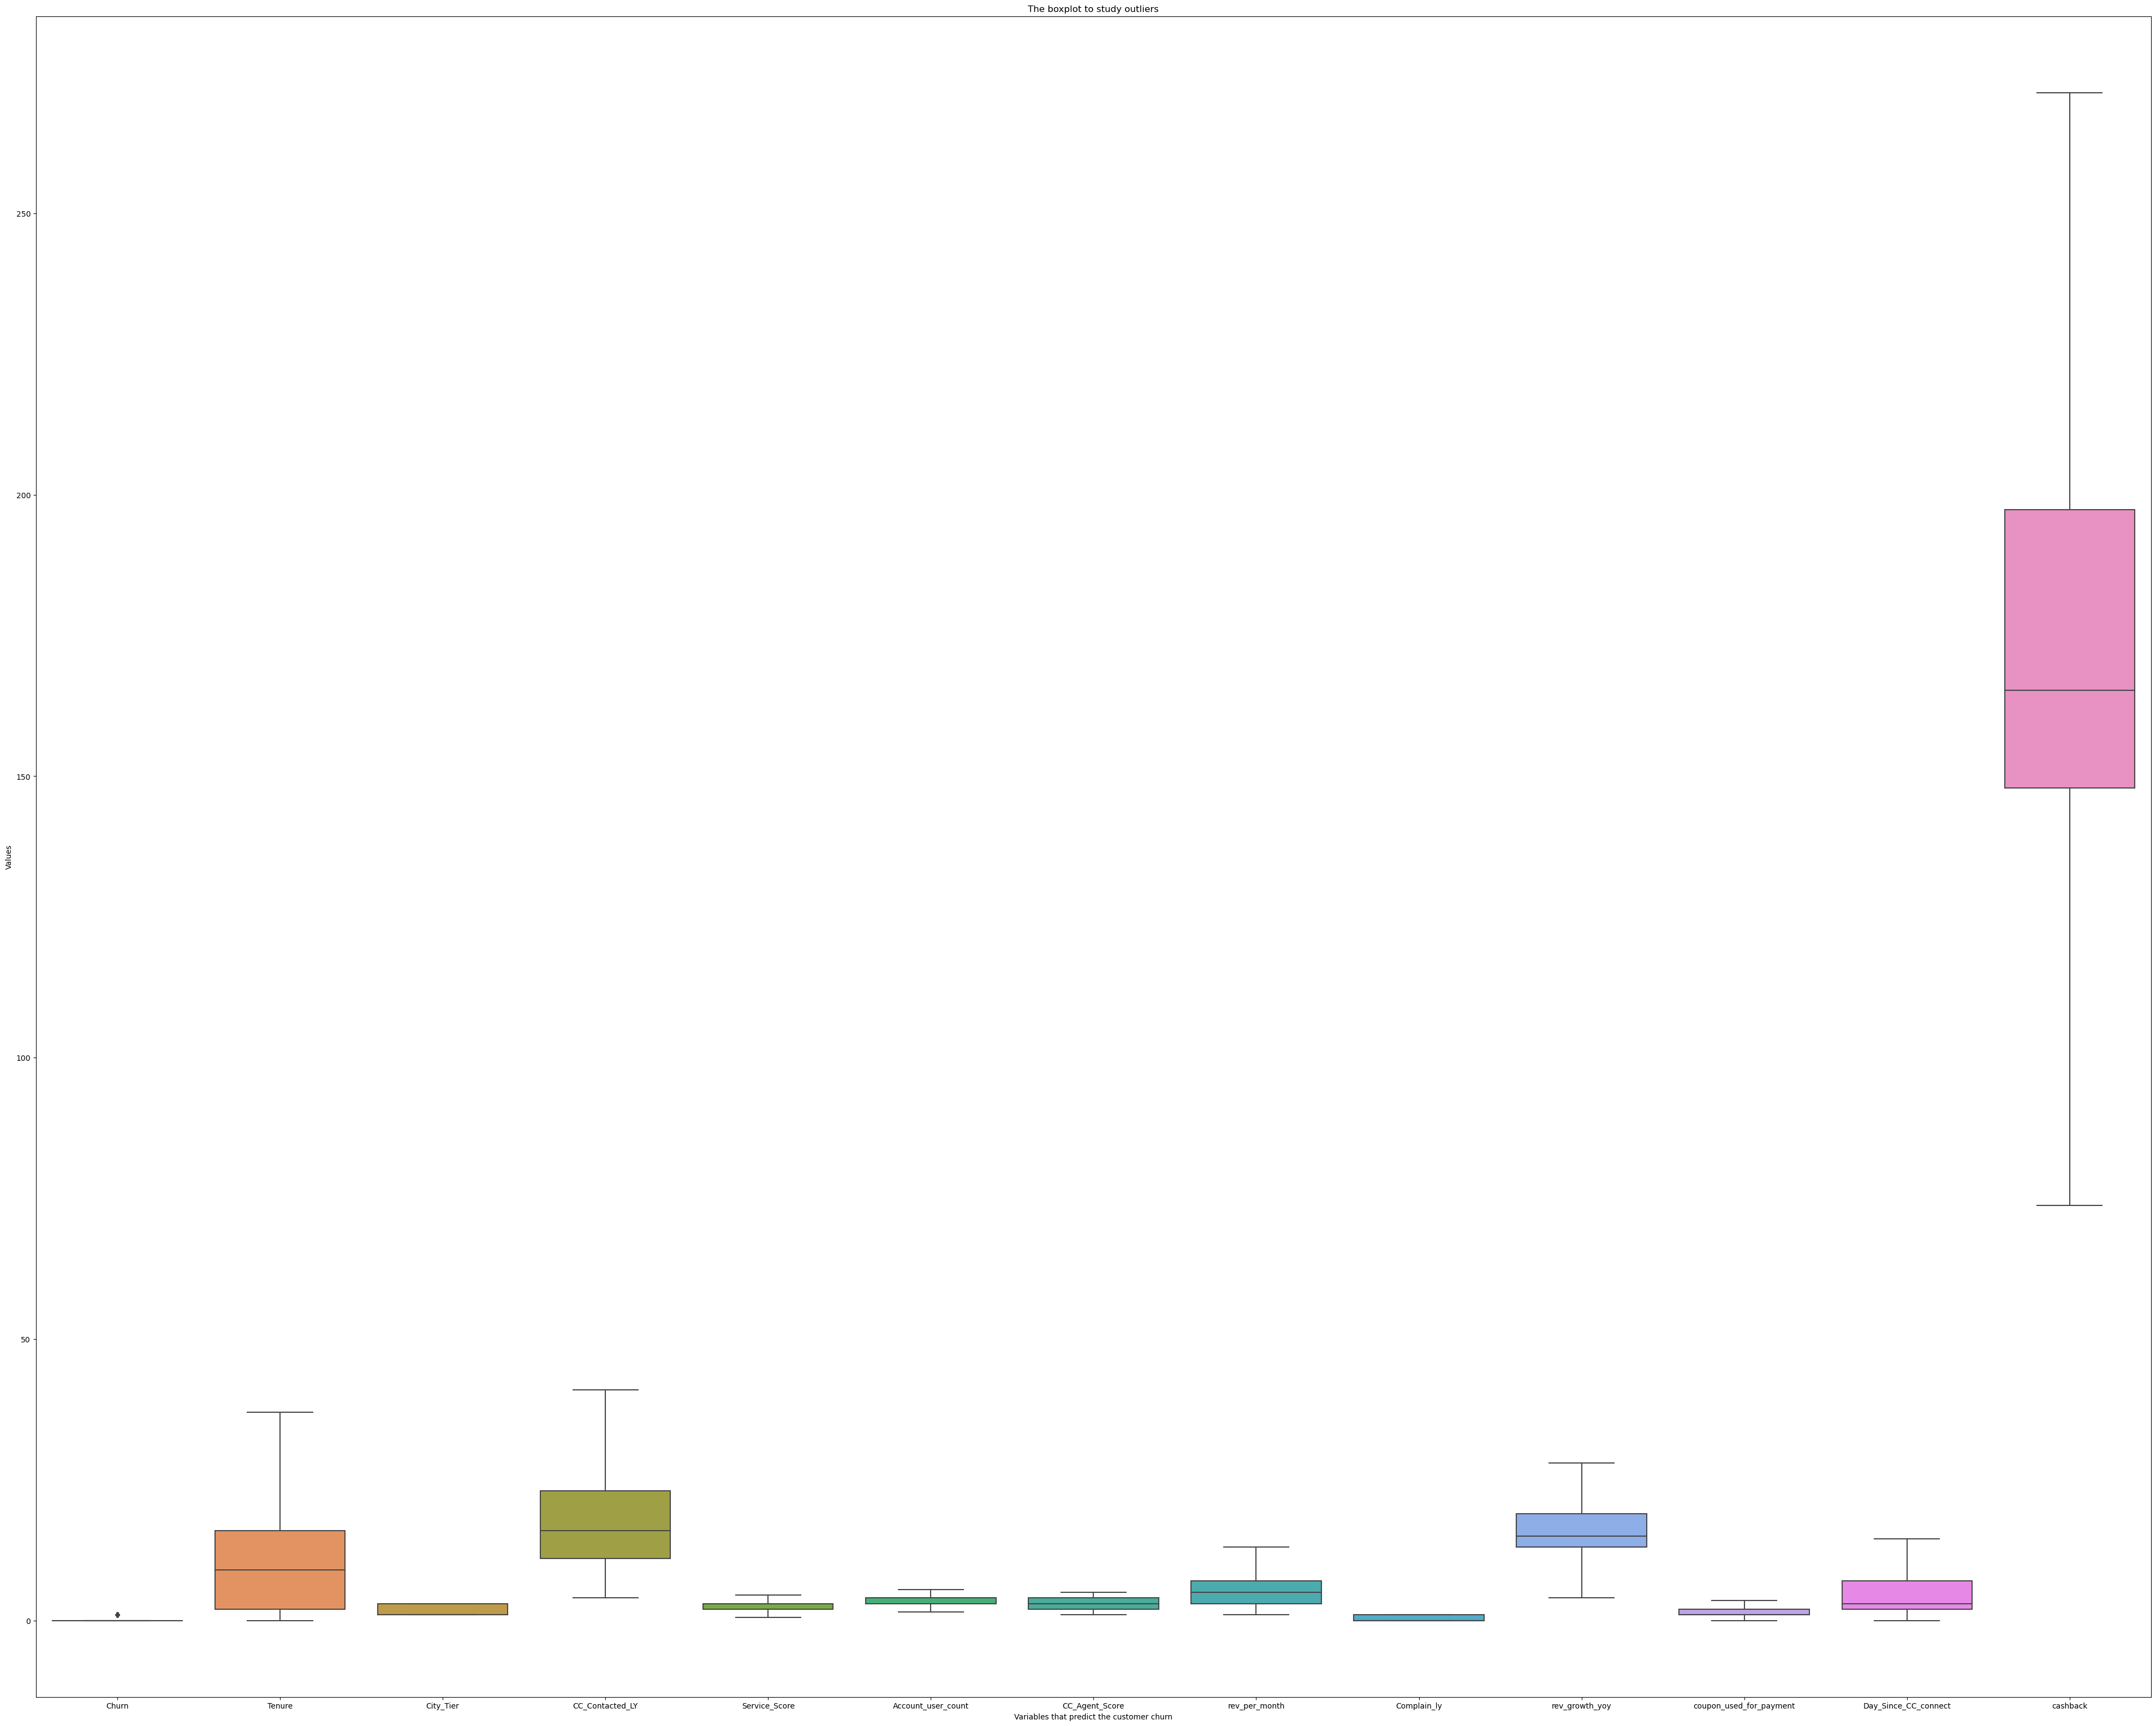

In [161]:
plt.figure(figsize=(50,40))
sns.boxplot(data=df1)
plt.title('The boxplot to study outliers')
plt.xlabel('Variables that predict the customer churn')
plt.ylabel('Values')

In [162]:
df1['Avg_Cashback_Per_User'] = df1['cashback'] / df1['Account_user_count']

In [163]:
# Percentage of customer churn
Churn_perc = round((df1['Churn'][df1['Churn']==1].count()*100/df1['Churn'][df1['Churn']==0].count()),2)

In [164]:
print('The average customer churn is:', Churn_perc,'%')

The average customer churn is: 20.25 %


In [169]:
# Splitting the dataset

X = df1.drop(['Churn'],axis=1)
y = df1['Churn']
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.70, random_state=1)

In [171]:
cat=[]
num=[]
for i in df1.columns:
  if df1[i].dtype=='object':
    cat.append(i)
  else:
    num.append(i)
print('cat = ',cat)
print('num = ',num)

cat =  ['Churn', 'Payment', 'Gender', 'account_segment', 'Marital_Status', 'Login_device']
num =  ['Tenure', 'City_Tier', 'CC_Contacted_LY', 'Service_Score', 'Account_user_count', 'CC_Agent_Score', 'rev_per_month', 'Complain_ly', 'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback', 'Avg_Cashback_Per_User']


In [172]:
df1[cat].describe()

Churn     Payment Gender account_segment Marital_Status Login_device
count   11260       11260  11260           11260          11260        11260
unique      2           5      2               7              3            2
top         0  Debit Card   Male           Super        Married       Mobile
freq     9364        4696   6812            4159           6072         8242

In [173]:
for i in cat:
    print(i)
    print()
    print(df1[i].value_counts())
    print()
    print()

Churn

0    9364
1    1896
Name: Churn, dtype: int64


Payment

Debit Card          4696
Credit Card         3511
E wallet            1217
Cash on Delivery    1014
UPI                  822
Name: Payment, dtype: int64


Gender

Male      6812
Female    4448
Name: Gender, dtype: int64


account_segment

Super           4159
Regular Plus    3862
HNI             1639
Super Plus       771
Regular          520
Regular +        262
Super +           47
Name: account_segment, dtype: int64


Marital_Status

Married     6072
Single      3520
Divorced    1668
Name: Marital_Status, dtype: int64


Login_device

Mobile      8242
Computer    3018
Name: Login_device, dtype: int64




In [174]:
df1[num].describe().T

count        mean        std        min     25%  \
Tenure                   11260.0   10.251421   8.888905   0.000000    2.00   
City_Tier                11260.0    1.647425   0.912763   1.000000    1.00   
CC_Contacted_LY          11260.0   17.815009   8.564140   4.000000   11.00   
Service_Score            11260.0    2.903508   0.720601   0.500000    2.00   
Account_user_count       11260.0    3.710790   0.924278   1.500000    3.00   
CC_Agent_Score           11260.0    3.065808   1.372663   1.000000    2.00   
rev_per_month            11260.0    5.250799   2.879616   1.000000    3.00   
Complain_ly              11260.0    0.276288   0.447181   0.000000    0.00   
rev_growth_yoy           11260.0   16.193073   3.757271   4.000000   13.00   
coupon_used_for_payment  11260.0    1.475311   1.102248   0.000000    1.00   
Day_Since_CC_connect     11260.0    4.546270   3.493493   0.000000    2.00   
cashback                 11260.0  177.284260  43.573285  73.760000  147.89   
Avg_Cashback_Per_User    11260.0   51.447464  21.153697  13.410909   38.34   

                                50%     75%     max  
Tenure                     9.000000   16.00   37.00  
City_Tier                  1.000000    3.00    3.00  
CC_Contacted_LY           16.000000   23.00   41.00  
Service_Score              3.000000    3.00    4.50  
Account_user_count         4.000000    4.00    5.50  
CC_Agent_Score             3.000000    4.00    5.00  
rev_per_month              5.000000    7.00   13.00  
Complain_ly                0.000000    1.00    1.00  
rev_growth_yoy            15.000000   19.00   28.00  
coupon_used_for_payment    1.000000    2.00    3.50  
Day_Since_CC_connect       3.000000    7.00   14.50  
cashback                 165.250000  197.31  271.44  
Avg_Cashback_Per_User     44.938333   56.98  180.96

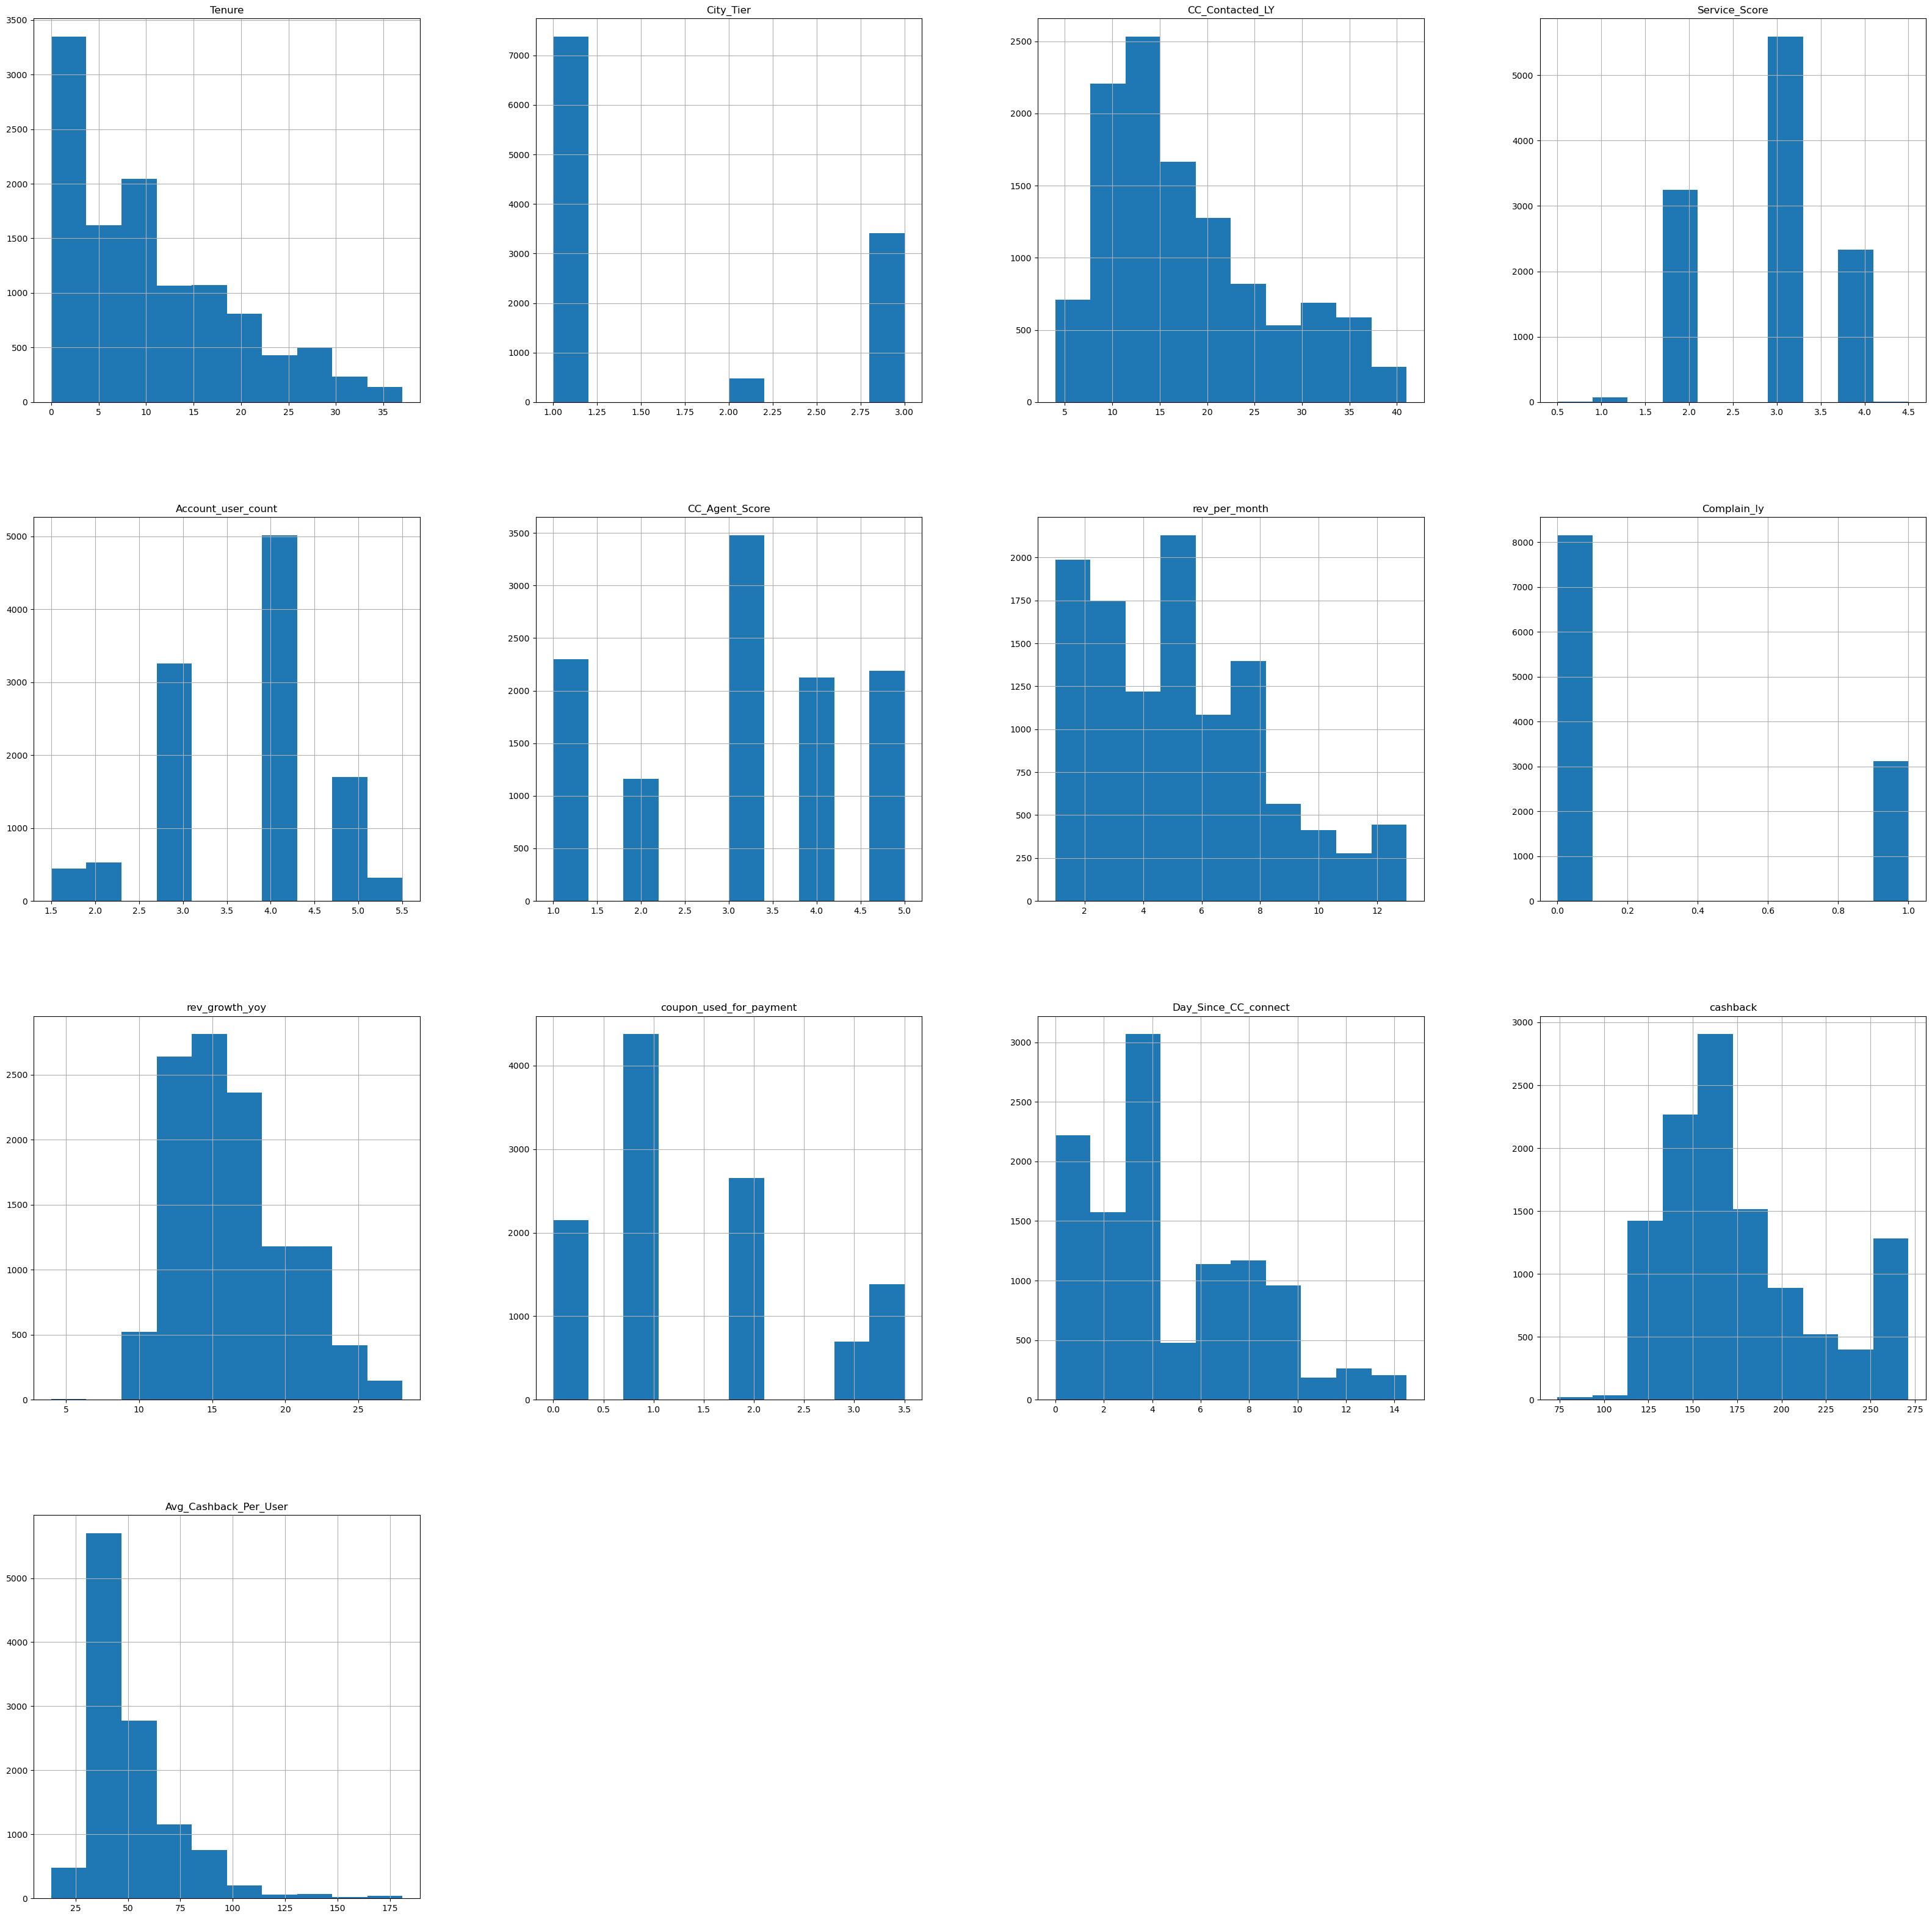

In [175]:
df1[num].hist(figsize=(40,40));

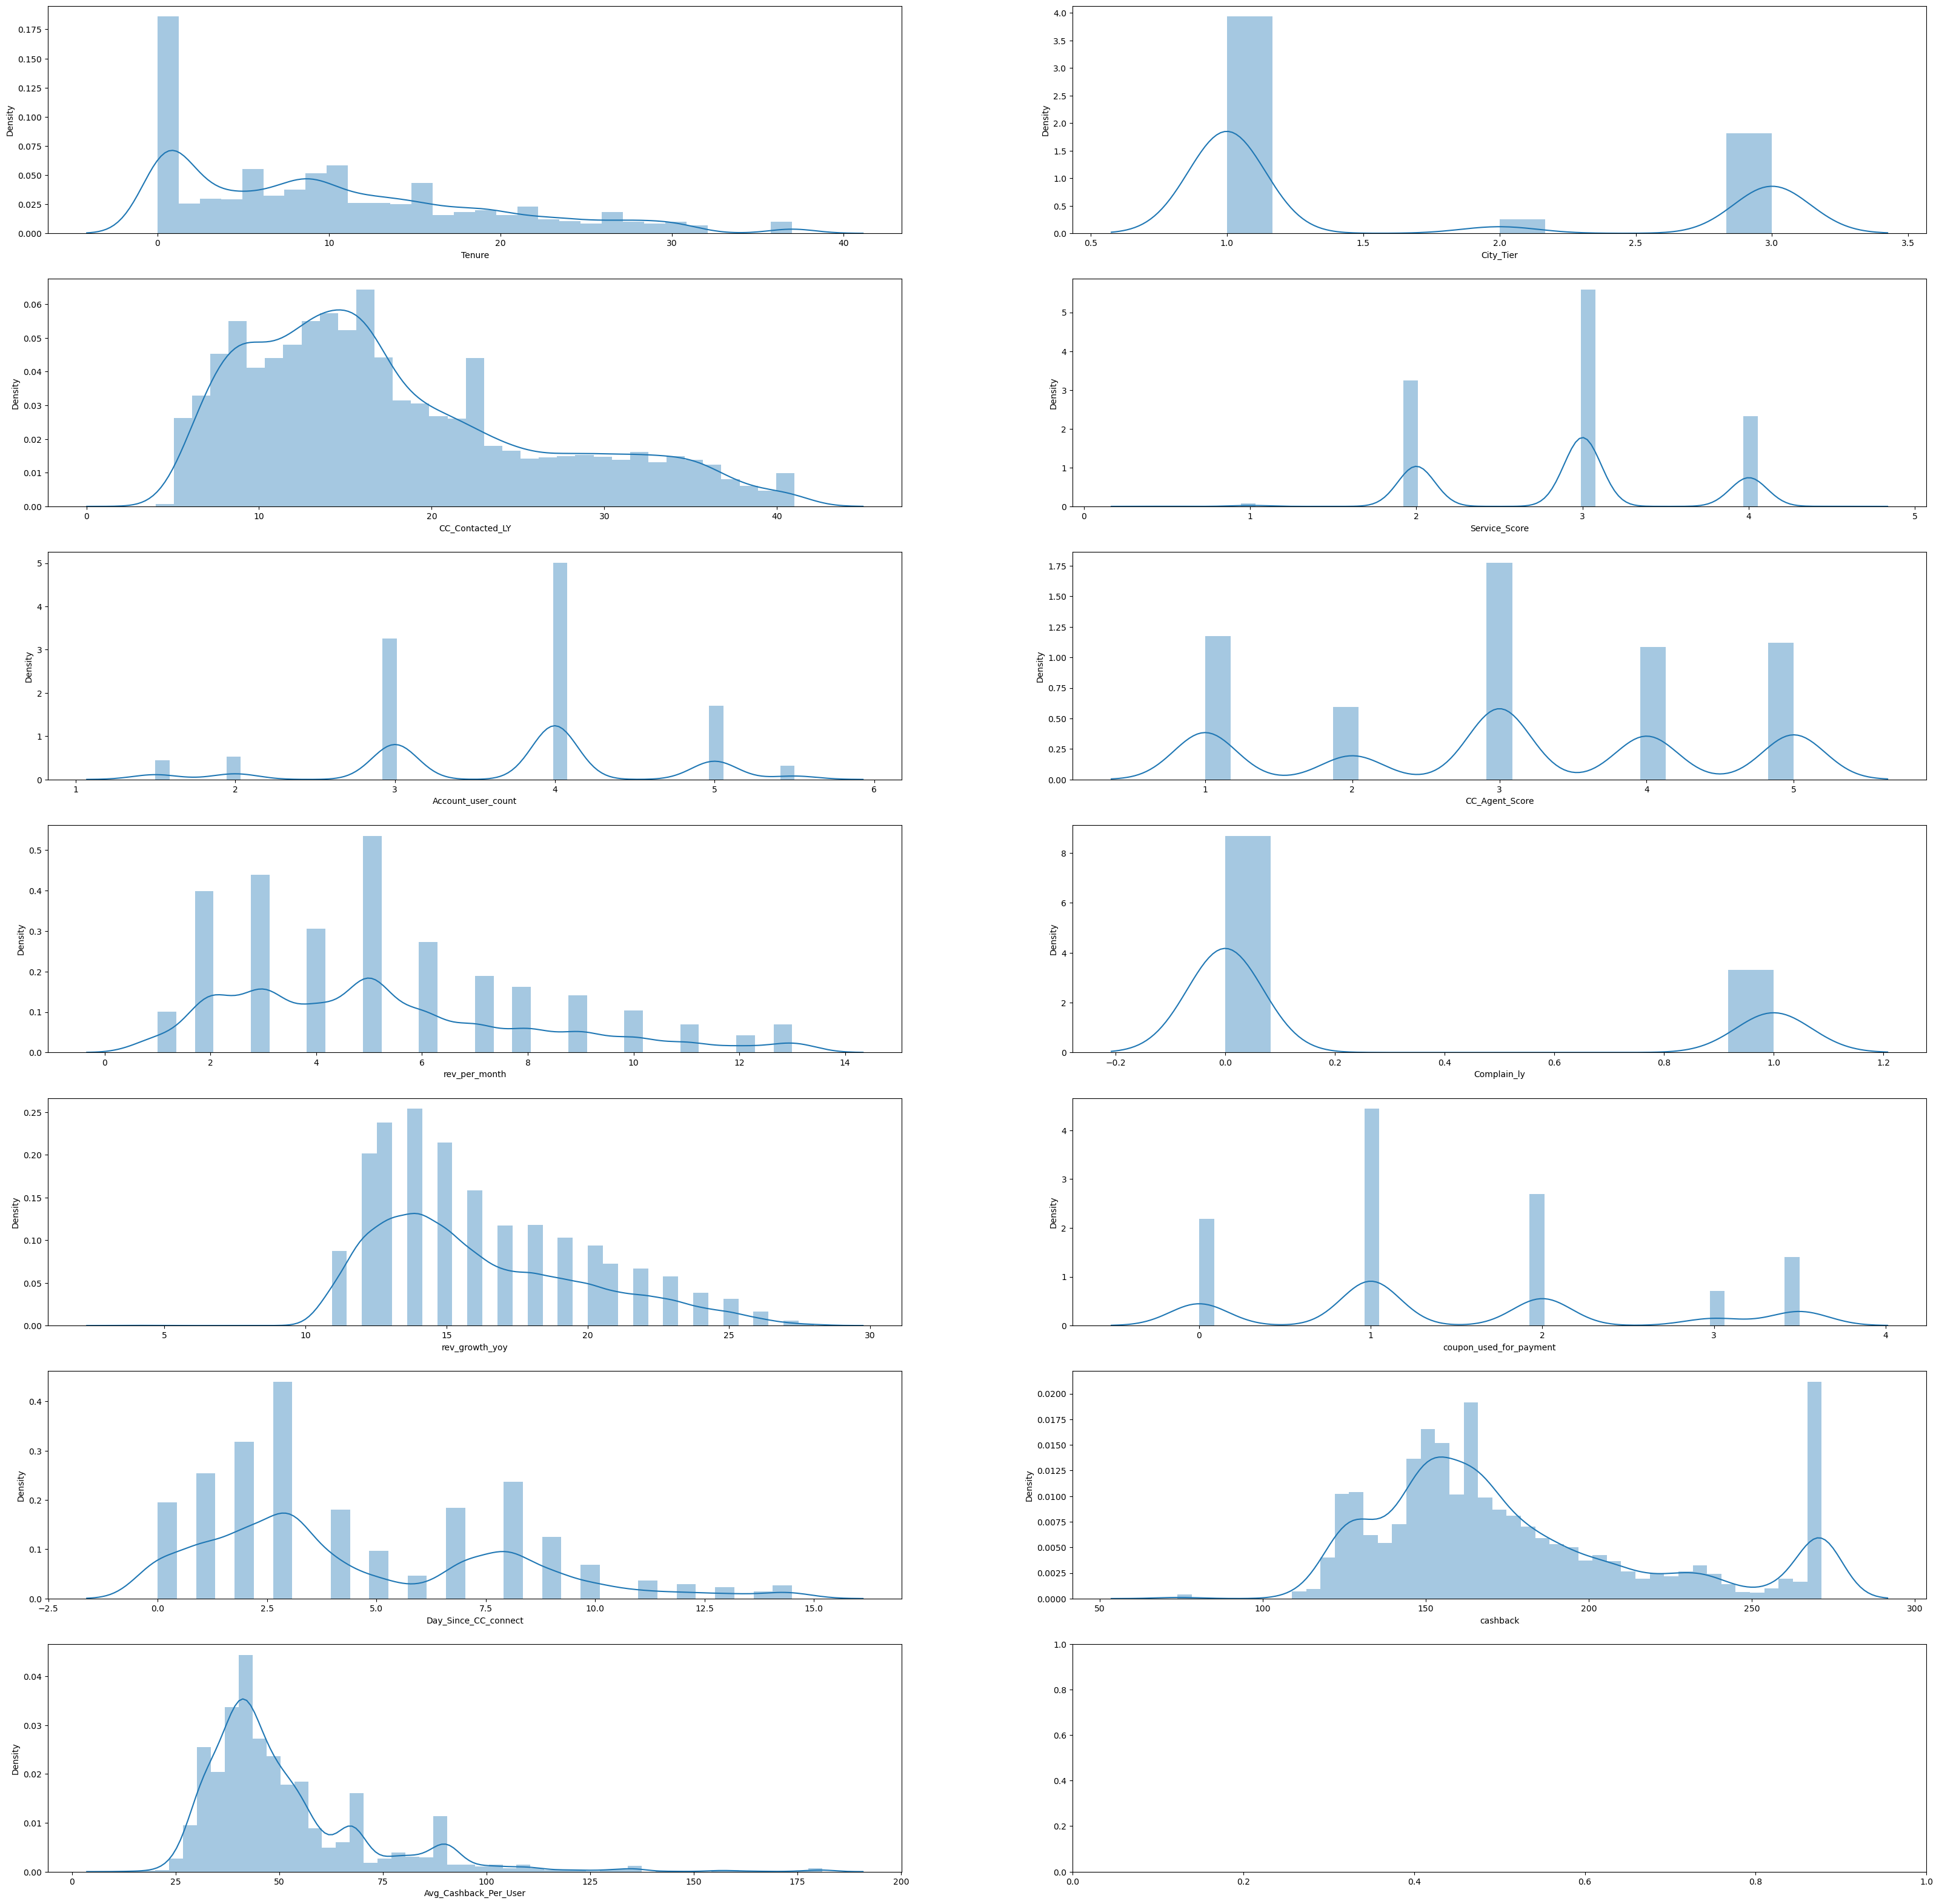

In [176]:
fig, ax = plt.subplots(7, 2, figsize=(40, 40))
for i, subplot in zip(num, ax.flatten()):
    sns.distplot(df1[i], ax=subplot);

In [177]:


# running loop for storing the calculating and storing the values in the relevant dataframes  
def calc_percentages(group):
  churn_sum = group['Churn'].sum()
  value_counts = group.value_counts()
  return pd.Series({'Customers_churned': churn_sum,
                    'Total_Customers': value_counts.sum(),
                    'perc_of_total_cust': round(churn_sum * 100 / value_counts.sum(), 2)})

# Define an empty dictionary to store results before the loop
d = {}

for i in df1.columns:
  d[i] = df1.groupby(i).apply(calc_percentages).reset_index()

In [178]:
for i in df1.columns:
    print(i)
    print(d[i])
    print()

Churn
   Churn  Customers_churned  Total_Customers  perc_of_total_cust
0      0                0.0           9364.0                 0.0
1      1             1896.0           1896.0               100.0

Tenure
    Tenure  Customers_churned  Total_Customers  perc_of_total_cust
0      0.0              669.0           1231.0               54.35
1      1.0              670.0           1351.0               49.59
2      2.0               32.0            354.0                9.04
3      3.0               43.0            410.0               10.49
4      4.0               43.0            403.0               10.67
5      5.0               30.0            403.0                7.44
6      6.0               15.0            363.0                4.13
7      7.0               32.0            450.0                7.11
8      8.0               29.0            519.0                5.59
9      9.0               69.0            714.0                9.66
10    10.0               27.0            423.0        

In [179]:
def analysis_chart(variable):
  # definig the plot for matplotlib
  plt.figure(figsize=(20,12))
  fig, ax = plt.subplots()
  # defining the title
  title1 = 'Customers Churn analysed by ' + variable
  plt.title(title1)
  # defining the lines for the y -axis
  line1 = ax.plot(d[variable][variable],d[variable]['Customers_churned'], color='lightskyblue', label = 'Customers churned')
  line2 = ax.plot(d[variable][variable],d[variable]['Total_Customers'], color='dodgerblue', label = 'Total Customers')
  # labelling the x -axis and y-axis
  plt.xlabel (variable)
  plt.ylabel ('No. of customers')
  # rotating the labels on the x-axis for better visualisation
  for tick in ax.get_xticklabels():
    tick.set_rotation(45)
  # defining another axis on the right side of the graph
  ax2=ax.twinx()
  # defining the line for the right side y -axis
  line3 = ax2.plot(d[variable][variable],d[variable]['perc_of_total_cust'], color='yellowgreen', label = 'Churn as Percent of total')
  y = 0*d[variable]['perc_of_total_cust']+20.25
  line4 = ax2.plot(d[variable][variable], y, color='orangered', label='Average customer Churn', linestyle='dashed')
  # labelling the right side y-axis
  plt.ylabel ('percentage of customers churned')
  # adding the three lines to show the legend on the right corner in a coherent place, not doing this will lead to overlapping of legends of lines belonging to left and right y axis
  lines = line1+line2+line3+line4
  labs = [l.get_label() for l in lines]
  ax.legend(lines, labs, bbox_to_anchor=(1.7, 1))
  # adding sns palette for better visualisation
  sns.despine(ax=ax, right=True, left=True)
  sns.despine(ax=ax2, left=True, right=False)

In [180]:
col = ['Tenure', 'City_Tier', 'CC_Contacted_LY', 'Payment', 'Gender',
       'Service_Score', 'Account_user_count', 'account_segment',
       'CC_Agent_Score', 'Marital_Status', 'rev_per_month', 'Complain_ly',
       'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect', 'Login_device']

<Figure size 2000x1200 with 0 Axes>

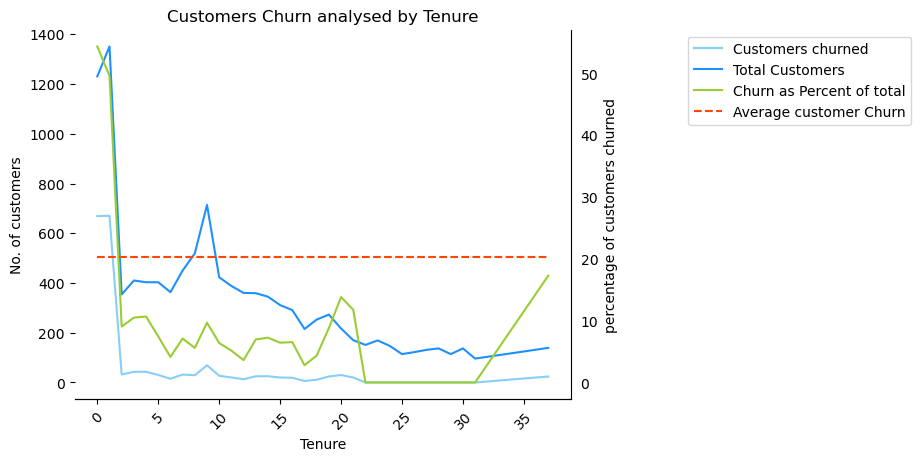

In [181]:
analysis_chart('Tenure');

<Figure size 2000x1200 with 0 Axes>

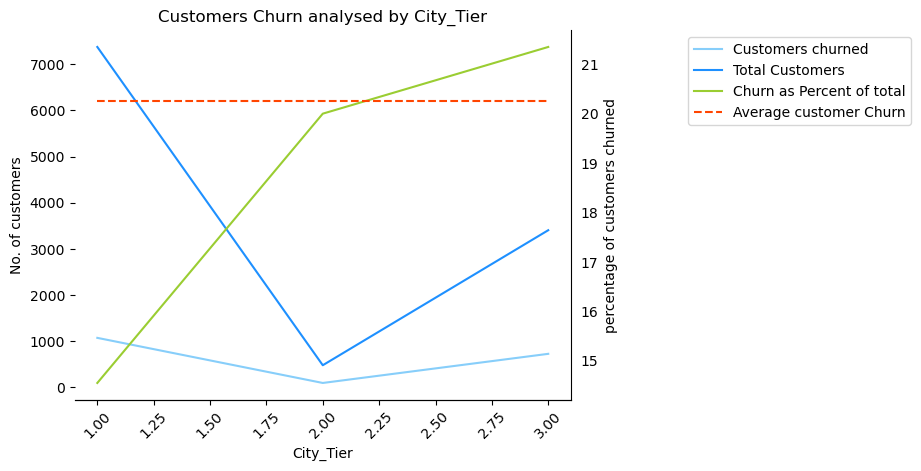

In [182]:
analysis_chart('City_Tier');

<Figure size 2000x1200 with 0 Axes>

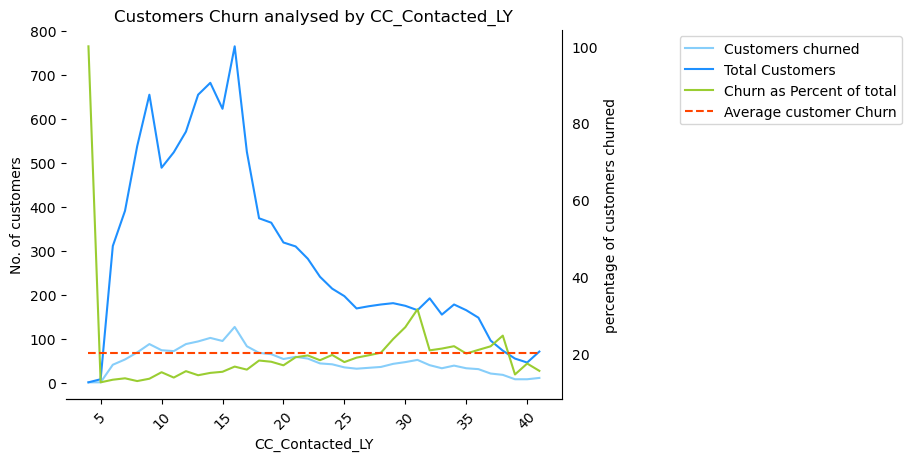

In [183]:
analysis_chart('CC_Contacted_LY');

<Figure size 2000x1200 with 0 Axes>

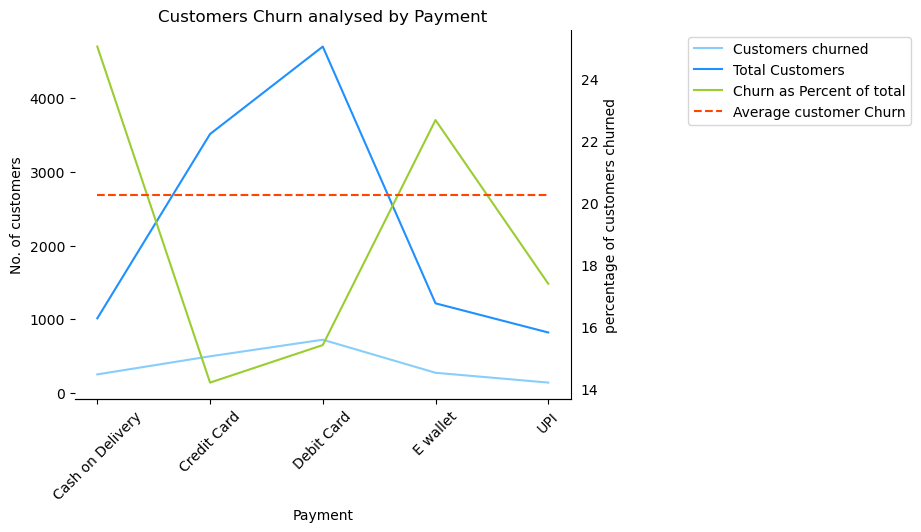

In [184]:
analysis_chart('Payment');

<Figure size 2000x1200 with 0 Axes>

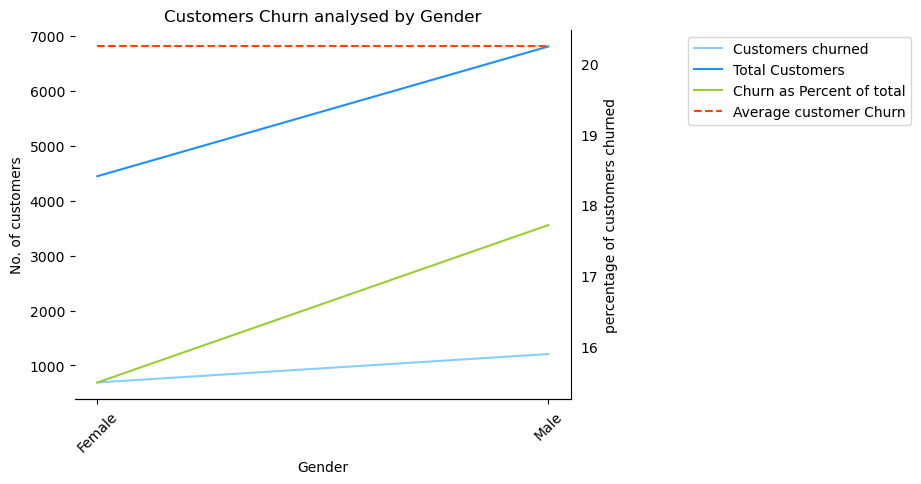

In [185]:
analysis_chart('Gender');

<Figure size 2000x1200 with 0 Axes>

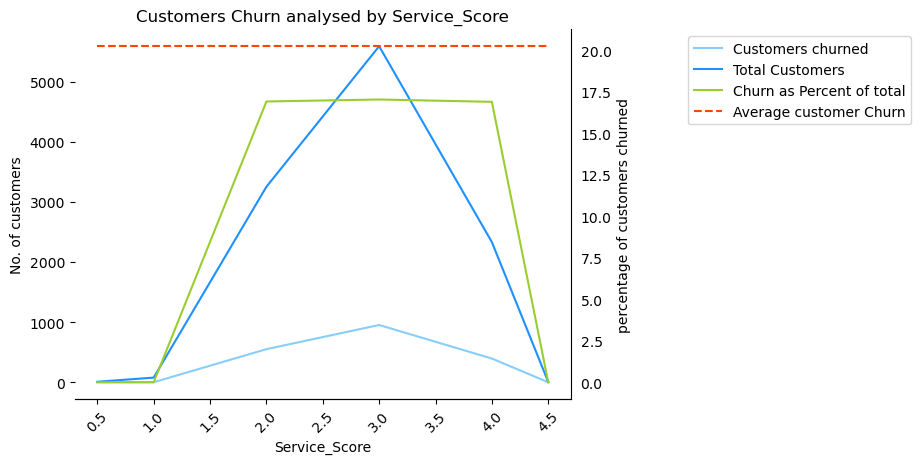

In [186]:
analysis_chart('Service_Score');

<Figure size 2000x1200 with 0 Axes>

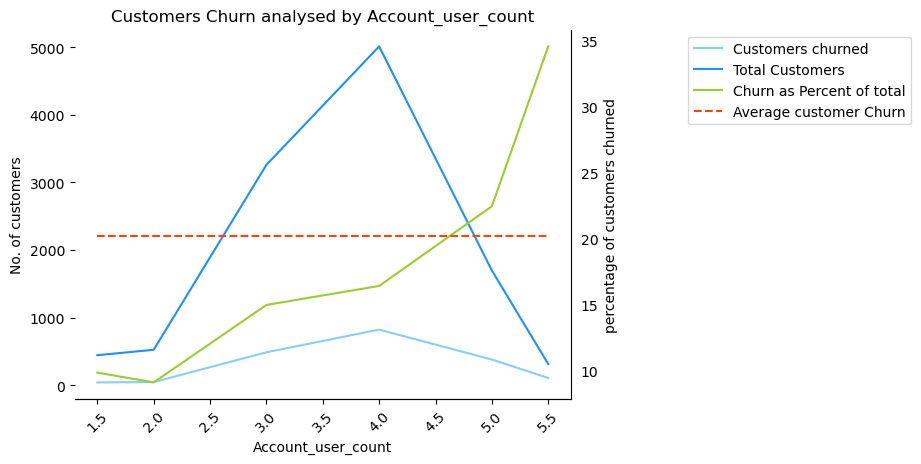

In [187]:
analysis_chart('Account_user_count');

<Figure size 2000x1200 with 0 Axes>

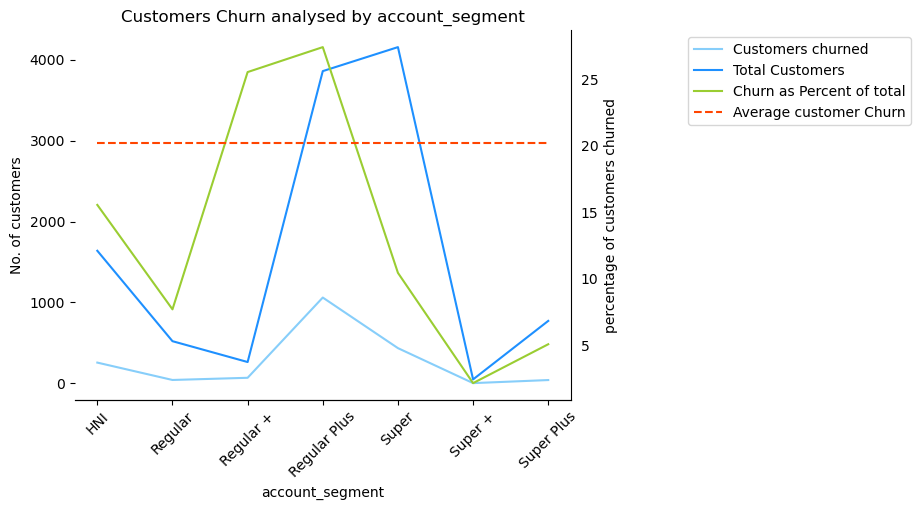

In [188]:
analysis_chart('account_segment');

<Figure size 2000x1200 with 0 Axes>

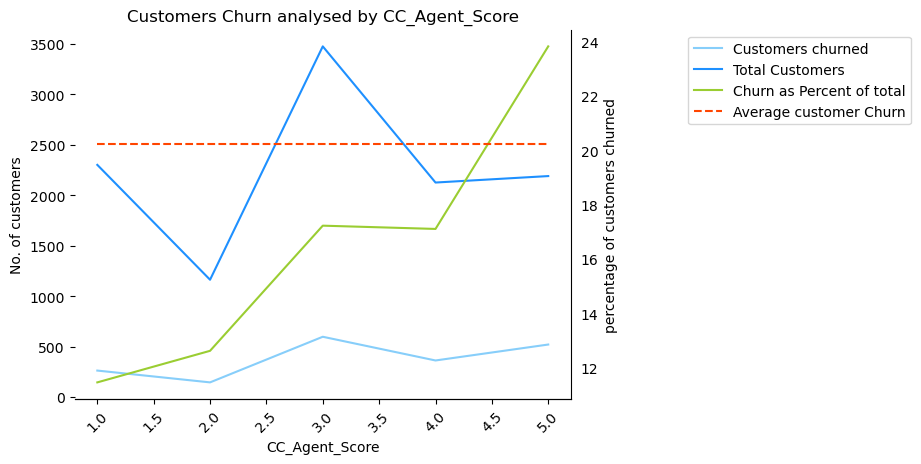

In [189]:
analysis_chart('CC_Agent_Score');

<Figure size 2000x1200 with 0 Axes>

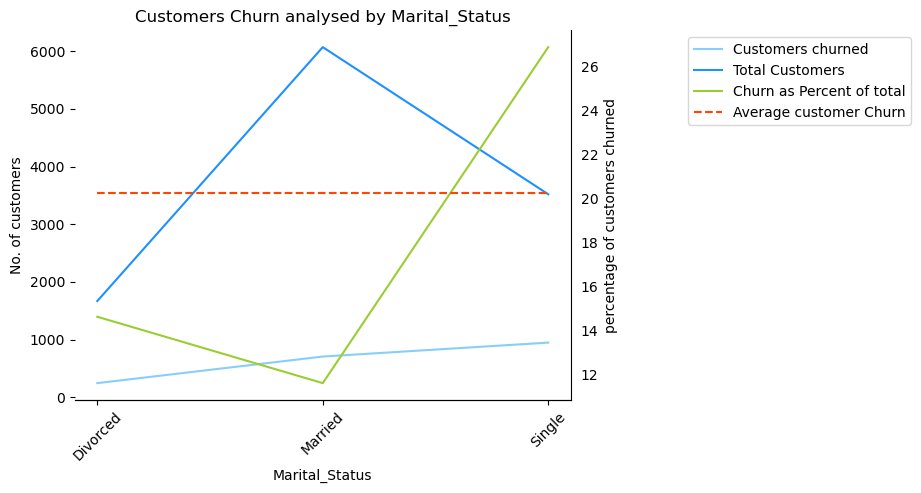

In [190]:
analysis_chart('Marital_Status');

<Figure size 2000x1200 with 0 Axes>

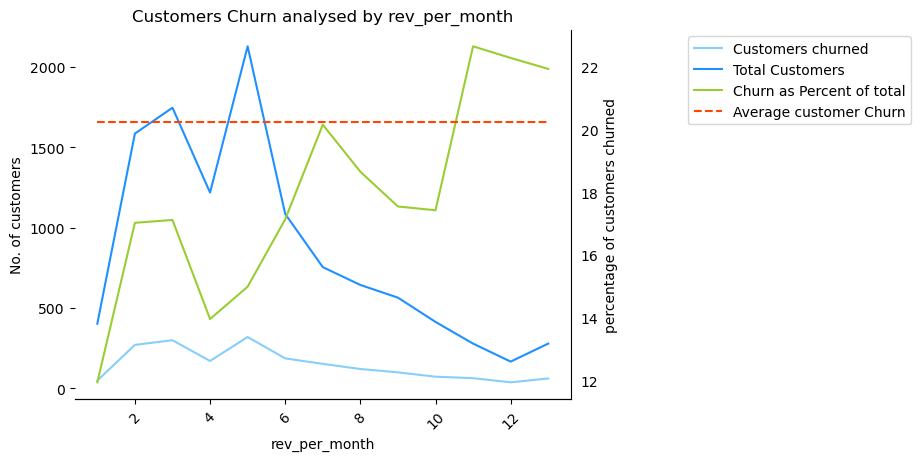

In [191]:
analysis_chart('rev_per_month');

<Figure size 2000x1200 with 0 Axes>

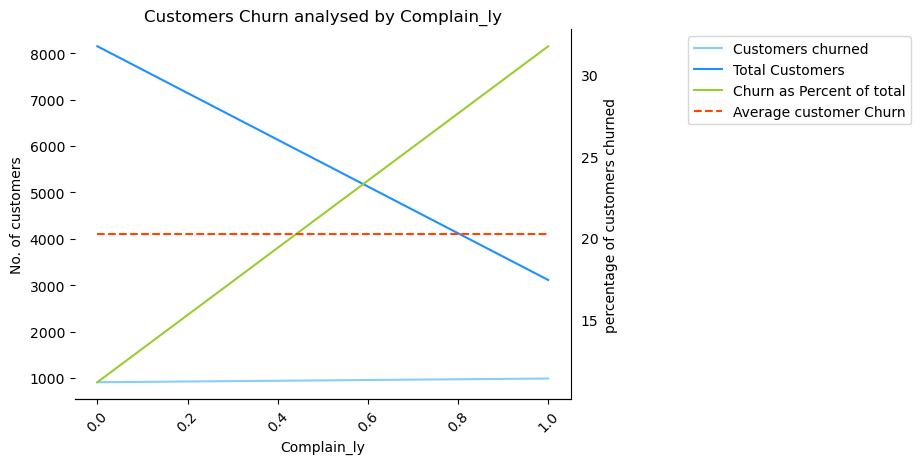

In [192]:
analysis_chart('Complain_ly');

<Figure size 2000x1200 with 0 Axes>

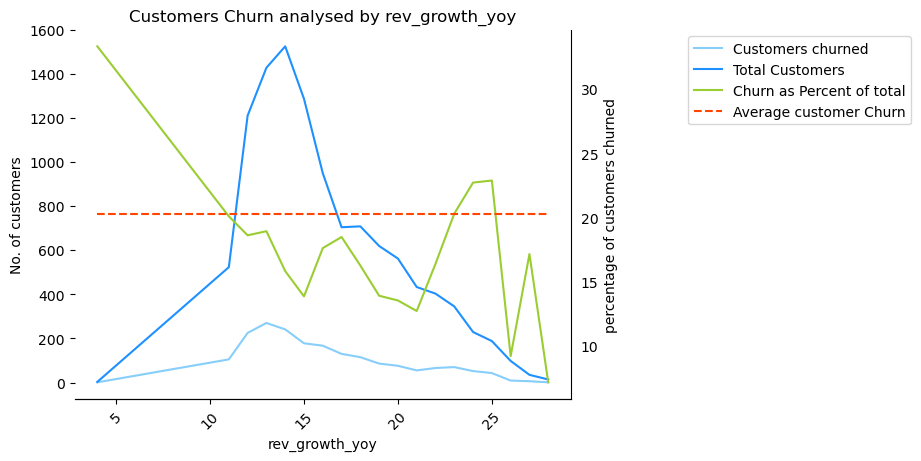

In [193]:
analysis_chart('rev_growth_yoy');

<Figure size 2000x1200 with 0 Axes>

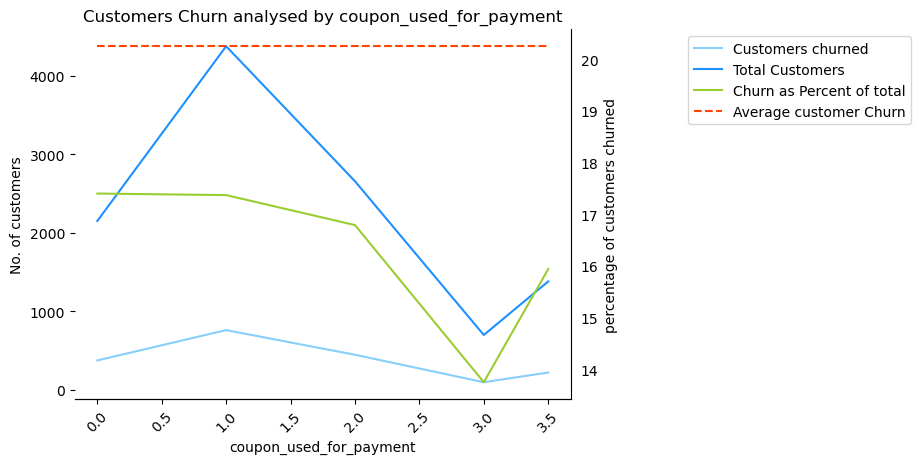

In [194]:
analysis_chart('coupon_used_for_payment');

<Figure size 2000x1200 with 0 Axes>

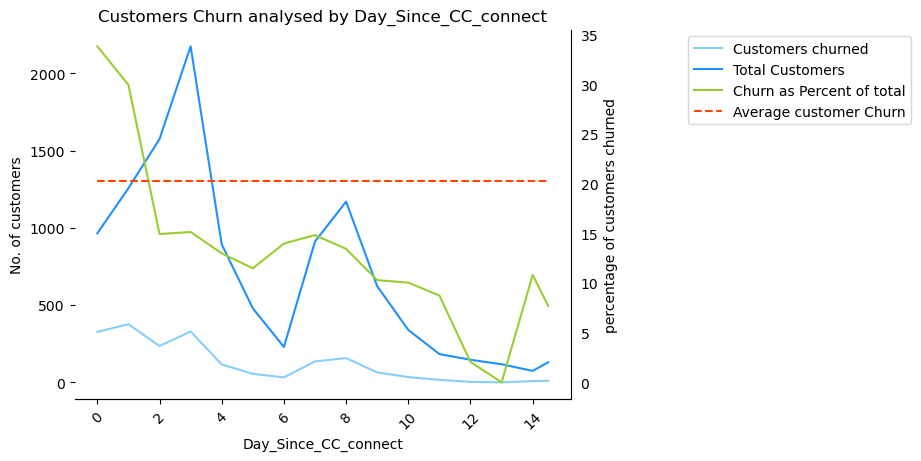

In [195]:
analysis_chart('Day_Since_CC_connect');

<Figure size 2000x1200 with 0 Axes>

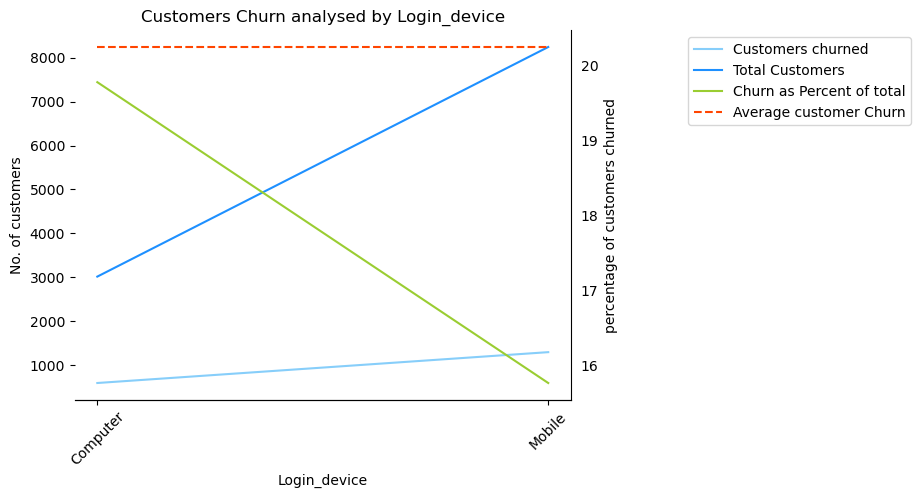

In [196]:
analysis_chart('Login_device');

<Figure size 2000x1200 with 0 Axes>

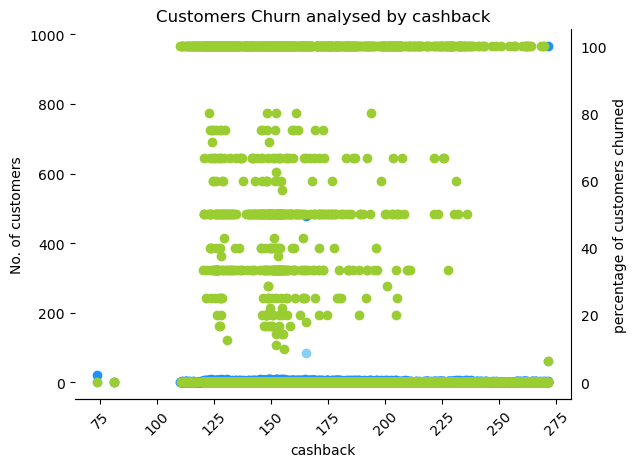

In [197]:
for i in ['cashback']:
    # definig the plot for matplotlib
    plt.figure(figsize=(20,12))
    fig, ax = plt.subplots()
    # defining the title
    title1 = 'Customers Churn analysed by ' + i
    plt.title(title1)
    # defining the lines for the y -axis
    line1 = ax.scatter(d[i][i],d[i]['Customers_churned'], color='lightskyblue', label = 'Customers churned')
    line2 = ax.scatter(d[i][i],d[i]['Total_Customers'], color='dodgerblue', label = 'Total Customers')
    # labelling the x -axis and y-axis
    plt.xlabel (i)
    plt.ylabel ('No. of customers')
    # rotating the labels on the x-axis for better visualisation
    for tick in ax.get_xticklabels():
      tick.set_rotation(45)
    # defining another axis on the right side of the graph
    ax2=ax.twinx()
    # defining the line for the right side y -axis
    line3 = ax2.scatter(d[i][i],d[i]['perc_of_total_cust'], color='yellowgreen', label = 'Churn as Percent of total')
    # labelling the right side y-axis
    plt.ylabel ('percentage of customers churned')
    # adding sns palette for better visualisation
    sns.despine(ax=ax, right=True, left=True)
    sns.despine(ax=ax2, left=True, right=False);

In [198]:
print('cat = ',cat)
print('num = ',num)

cat =  ['Churn', 'Payment', 'Gender', 'account_segment', 'Marital_Status', 'Login_device']
num =  ['Tenure', 'City_Tier', 'CC_Contacted_LY', 'Service_Score', 'Account_user_count', 'CC_Agent_Score', 'rev_per_month', 'Complain_ly', 'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback', 'Avg_Cashback_Per_User']


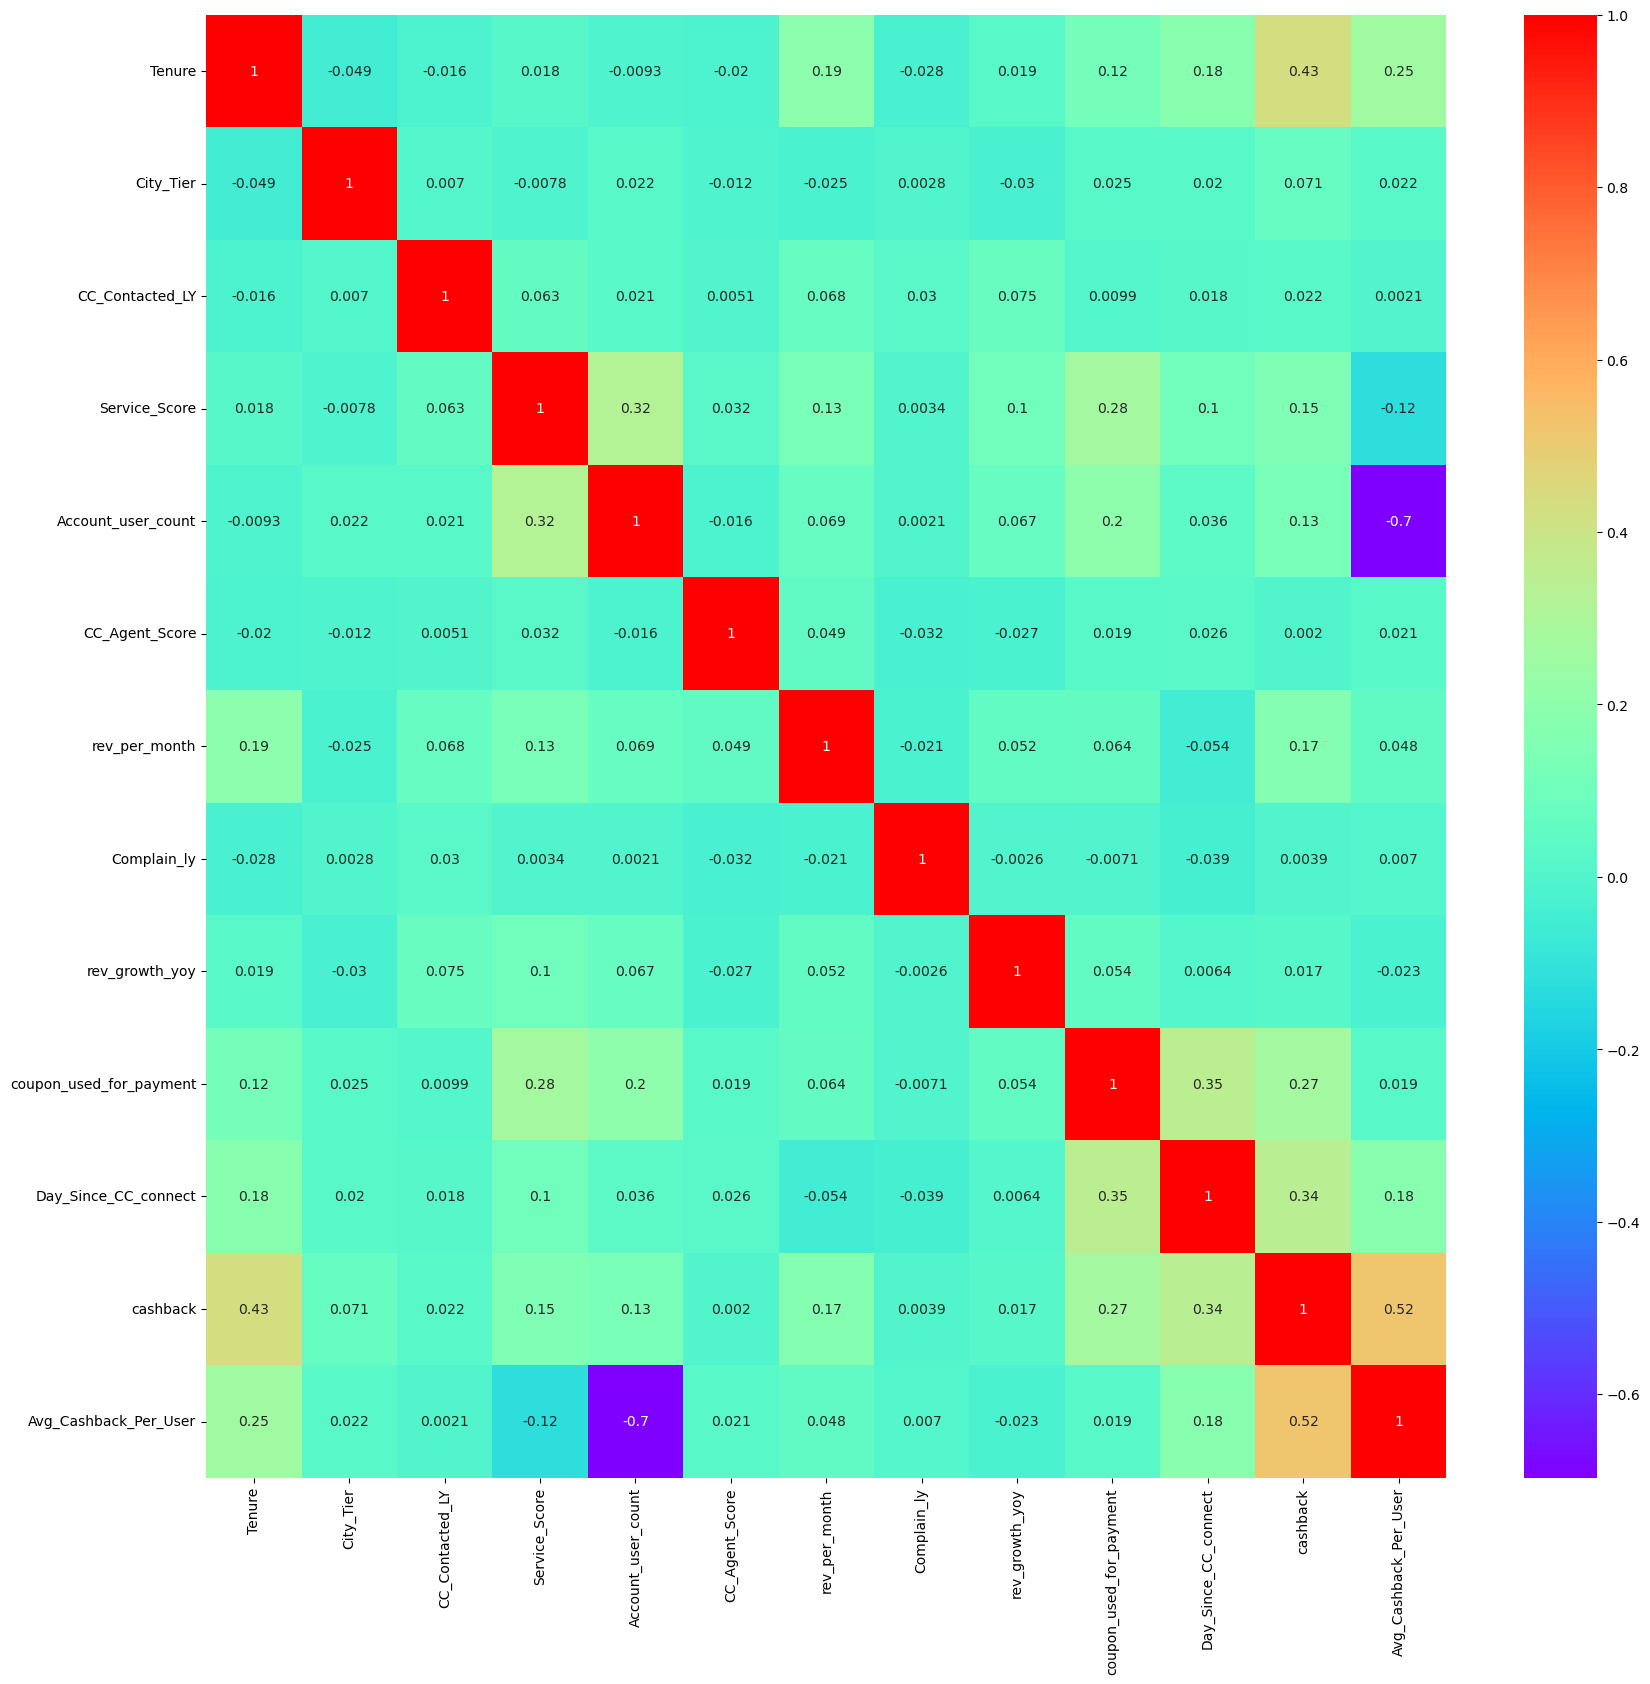

In [199]:
plt.figure(figsize=(20,19))
sns.heatmap(df1.corr(),annot=True,cmap="rainbow");

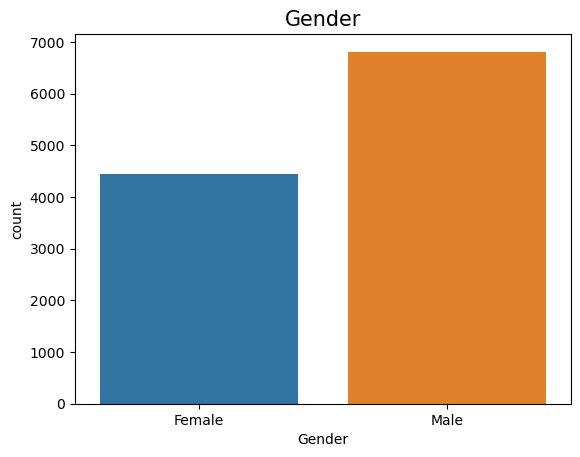

In [200]:
a = sns.countplot(data = df1, x = 'Gender');
a.set_title("Gender",fontsize=15);

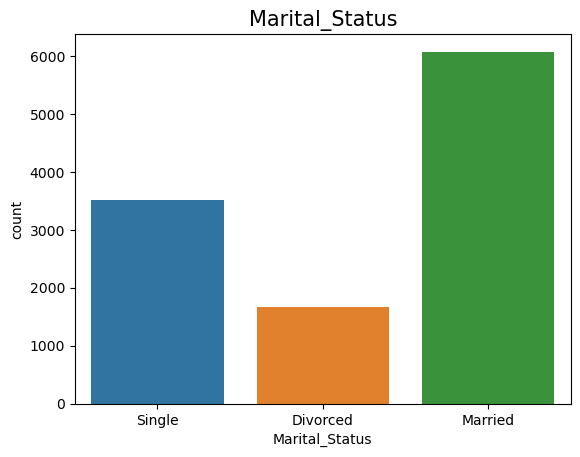

In [201]:
a = sns.countplot(data = df1, x = 'Marital_Status');
a.set_title("Marital_Status",fontsize=15);

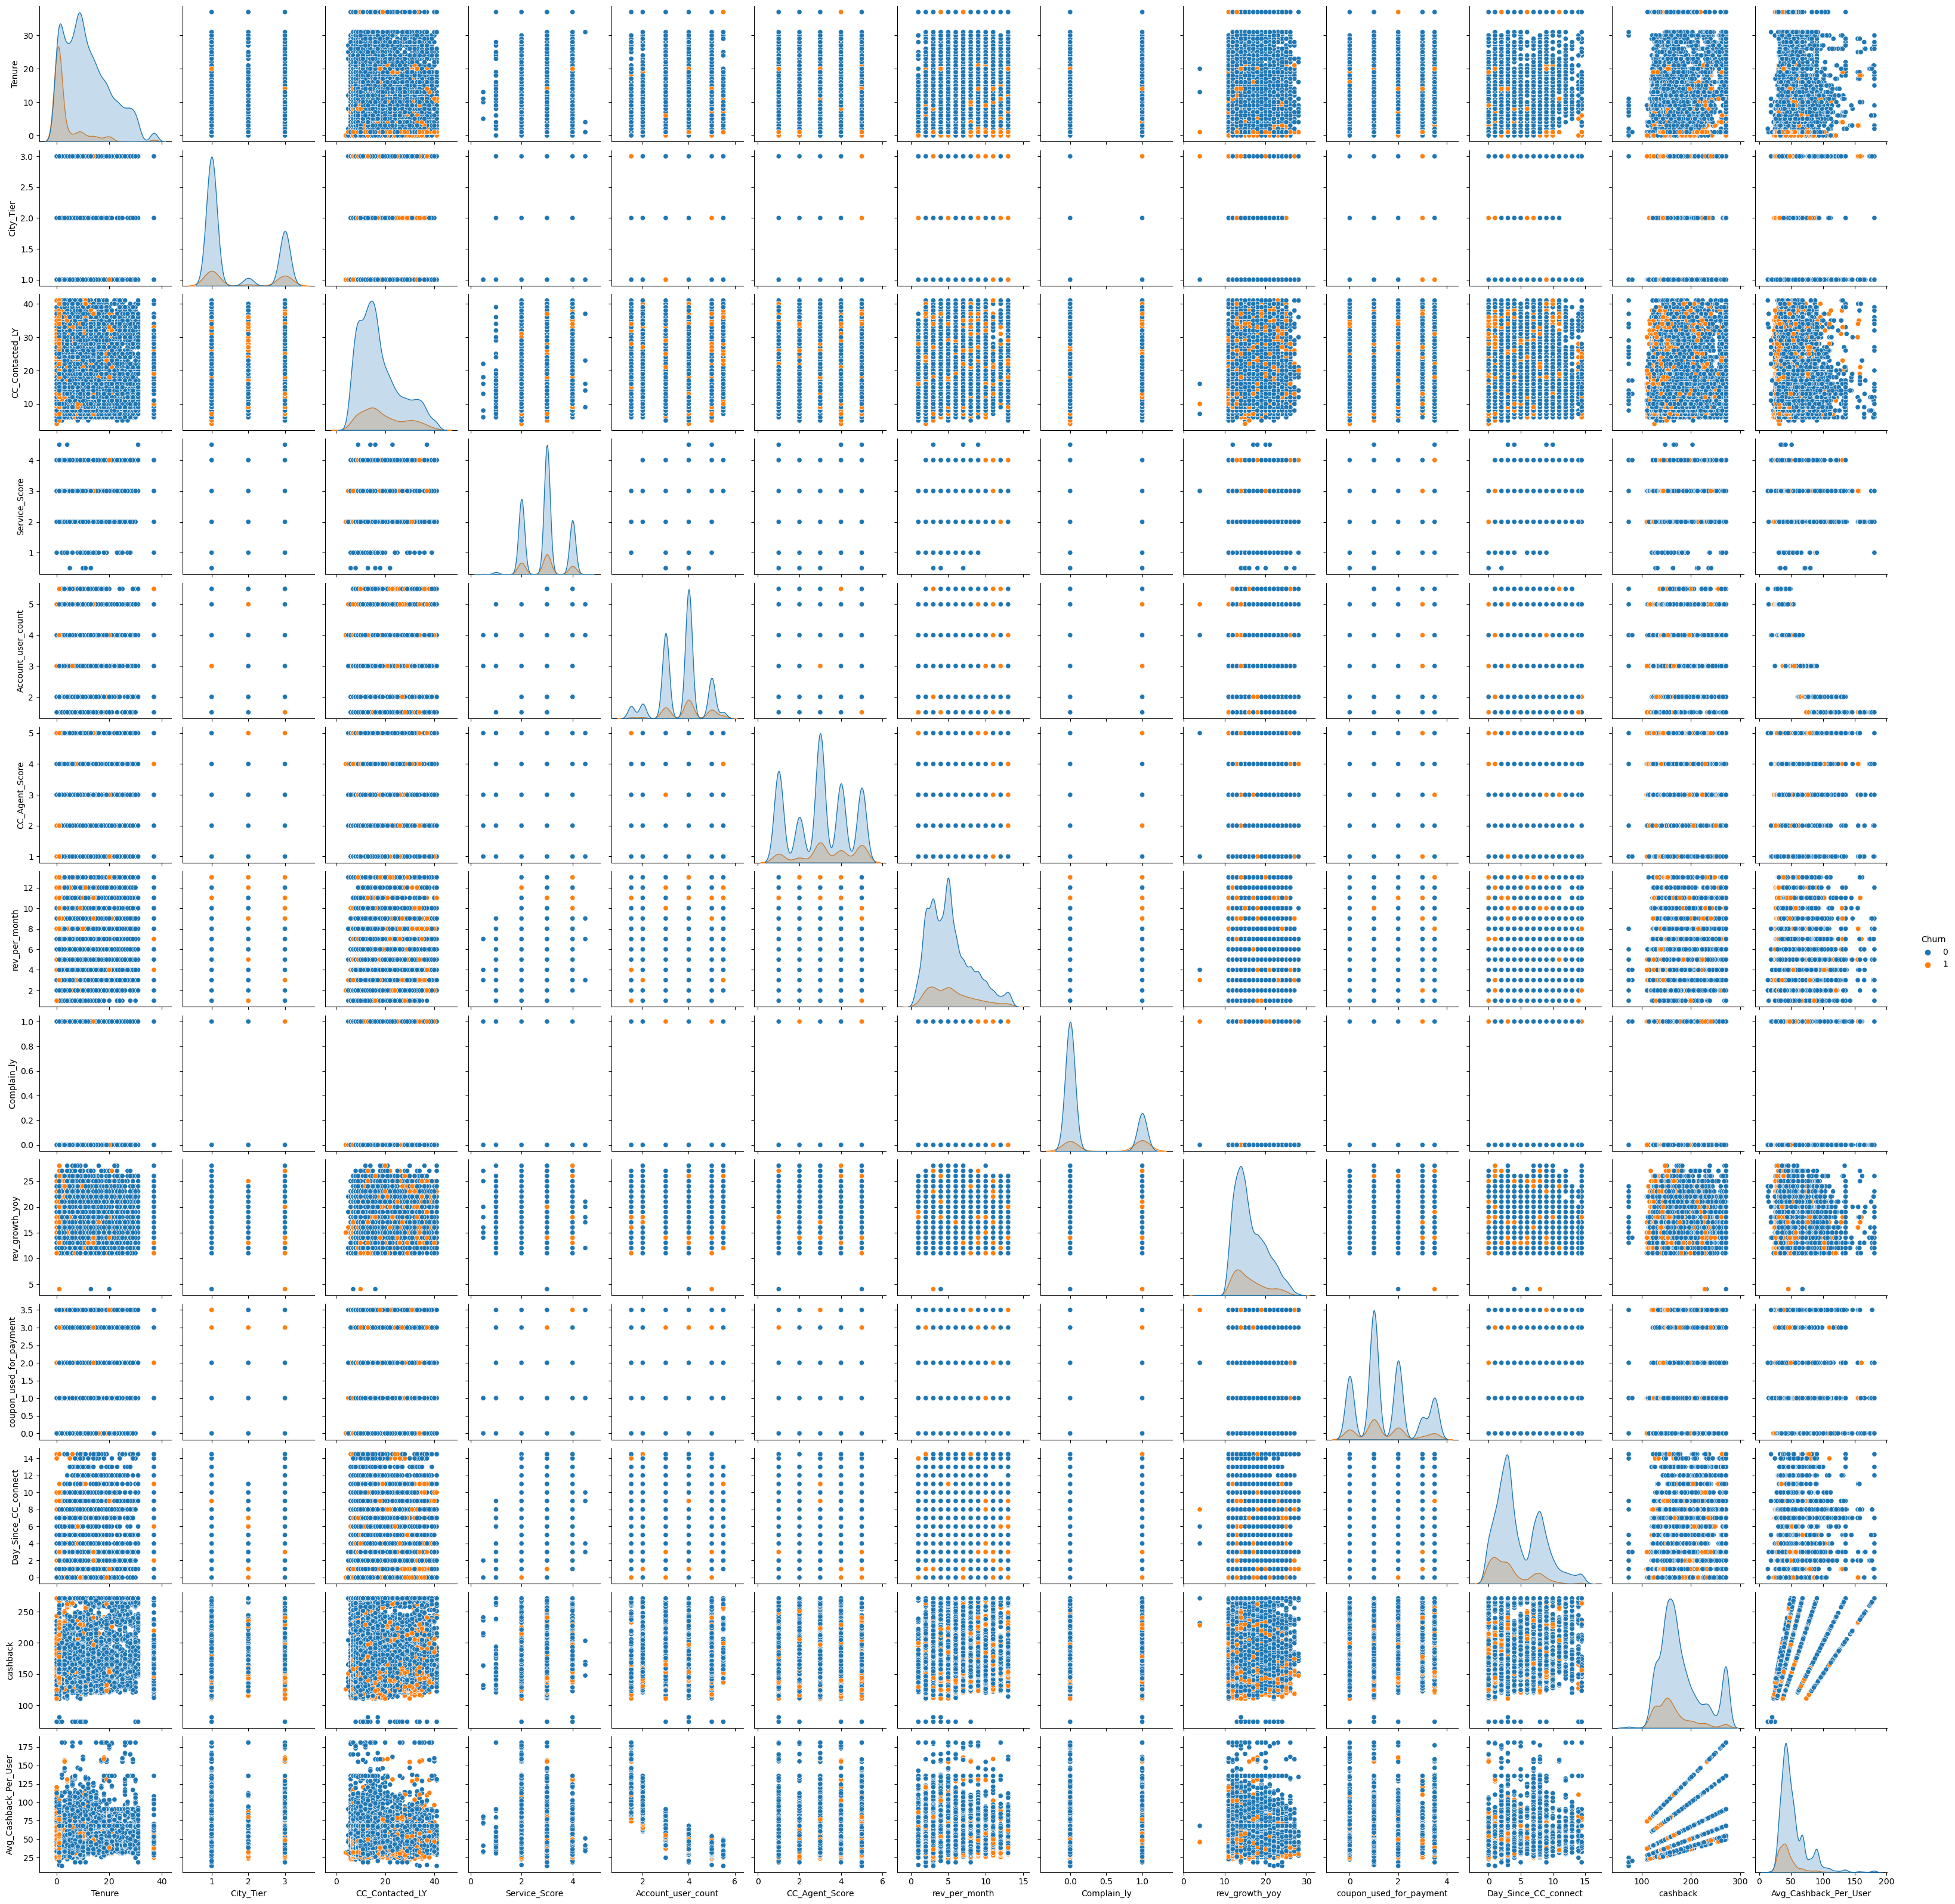

In [202]:
sns.pairplot(df1,hue="Churn");

In [203]:
df1_encoded=df1.copy()
df1_encoded.head().T

0             1             2           3  \
Churn                             1             1             1           1   
Tenure                          4.0           0.0           0.0         0.0   
City_Tier                       3.0           1.0           1.0         3.0   
CC_Contacted_LY                 6.0           8.0          30.0        15.0   
Payment                  Debit Card           UPI    Debit Card  Debit Card   
Gender                       Female          Male          Male        Male   
Service_Score                   3.0           3.0           2.0         2.0   
Account_user_count              3.0           4.0           4.0         4.0   
account_segment               Super  Regular Plus  Regular Plus       Super   
CC_Agent_Score                  2.0           3.0           3.0         5.0   
Marital_Status               Single        Single        Single      Single   
rev_per_month                   9.0           7.0           6.0         8.0   
Complain_ly                     1.0           1.0           1.0         0.0   
rev_growth_yoy                 11.0          15.0          14.0        23.0   
coupon_used_for_payment         1.0           0.0           0.0         0.0   
Day_Since_CC_connect            5.0           0.0           3.0         3.0   
cashback                     159.93         120.9        165.25      134.07   
Login_device                 Mobile        Mobile        Mobile      Mobile   
Avg_Cashback_Per_User         53.31        30.225       41.3125     33.5175   

                                    4  
Churn                               1  
Tenure                            0.0  
City_Tier                         1.0  
CC_Contacted_LY                  12.0  
Payment                   Credit Card  
Gender                           Male  
Service_Score                     2.0  
Account_user_count                3.0  
account_segment          Regular Plus  
CC_Agent_Score                    5.0  
Marital_Status                 Single  
rev_per_month                     3.0  
Complain_ly                       0.0  
rev_growth_yoy                   11.0  
coupon_used_for_payment           1.0  
Day_Since_CC_connect              3.0  
cashback                        129.6  
Login_device                   Mobile  
Avg_Cashback_Per_User            43.2

In [204]:
#one HOT encoding
df1_encoded = pd.get_dummies(df1_encoded,drop_first=True)

In [205]:
df1_encoded.head().T

0        1         2         3      4
Tenure                          4.00    0.000    0.0000    0.0000    0.0
City_Tier                       3.00    1.000    1.0000    3.0000    1.0
CC_Contacted_LY                 6.00    8.000   30.0000   15.0000   12.0
Service_Score                   3.00    3.000    2.0000    2.0000    2.0
Account_user_count              3.00    4.000    4.0000    4.0000    3.0
CC_Agent_Score                  2.00    3.000    3.0000    5.0000    5.0
rev_per_month                   9.00    7.000    6.0000    8.0000    3.0
Complain_ly                     1.00    1.000    1.0000    0.0000    0.0
rev_growth_yoy                 11.00   15.000   14.0000   23.0000   11.0
coupon_used_for_payment         1.00    0.000    0.0000    0.0000    1.0
Day_Since_CC_connect            5.00    0.000    3.0000    3.0000    3.0
cashback                      159.93  120.900  165.2500  134.0700  129.6
Avg_Cashback_Per_User          53.31   30.225   41.3125   33.5175   43.2
Churn_1                         1.00    1.000    1.0000    1.0000    1.0
Payment_Credit Card             0.00    0.000    0.0000    0.0000    1.0
Payment_Debit Card              1.00    0.000    1.0000    1.0000    0.0
Payment_E wallet                0.00    0.000    0.0000    0.0000    0.0
Payment_UPI                     0.00    1.000    0.0000    0.0000    0.0
Gender_Male                     0.00    1.000    1.0000    1.0000    1.0
account_segment_Regular         0.00    0.000    0.0000    0.0000    0.0
account_segment_Regular +       0.00    0.000    0.0000    0.0000    0.0
account_segment_Regular Plus    0.00    1.000    1.0000    0.0000    1.0
account_segment_Super           1.00    0.000    0.0000    1.0000    0.0
account_segment_Super +         0.00    0.000    0.0000    0.0000    0.0
account_segment_Super Plus      0.00    0.000    0.0000    0.0000    0.0
Marital_Status_Married          0.00    0.000    0.0000    0.0000    0.0
Marital_Status_Single           1.00    1.000    1.0000    1.0000    1.0
Login_device_Mobile             1.00    1.000    1.0000    1.0000    1.0

In [206]:
#Standardization
scaler = StandardScaler()
features = df1_encoded[num]
features = scaler.fit_transform(features)

In [207]:
scaled_df1_encoded = df1_encoded.copy()

In [208]:
scaled_df1_encoded[num] = features

In [209]:
scaled_df1_encoded.head().T

0         1         2         3         4
Tenure                       -0.703315 -1.153334 -1.153334 -1.153334 -1.153334
City_Tier                     1.481914 -0.709334 -0.709334  1.481914 -0.709334
CC_Contacted_LY              -1.379652 -1.146110  1.422855 -0.328712 -0.679025
Service_Score                 0.133911  0.133911 -1.253882 -1.253882 -1.253882
Account_user_count           -0.769057  0.312917  0.312917  0.312917 -0.769057
CC_Agent_Score               -0.776488 -0.047944 -0.047944  1.409143  1.409143
rev_per_month                 1.302037  0.607469  0.260185  0.954753 -0.781666
Complain_ly                   1.618461  1.618461  1.618461 -0.617871 -0.617871
rev_growth_yoy               -1.382201 -0.317551 -0.583714  1.811748 -1.382201
coupon_used_for_payment      -0.431239 -1.338515 -1.338515 -1.338515 -0.431239
Day_Since_CC_connect          0.129884 -1.301411 -0.442634 -0.442634 -0.442634
cashback                     -0.398295 -1.294067 -0.276197 -0.991804 -1.094395
Avg_Cashback_Per_User         0.088052 -1.003295 -0.479132 -0.847642 -0.389900
Churn_1                       1.000000  1.000000  1.000000  1.000000  1.000000
Payment_Credit Card           0.000000  0.000000  0.000000  0.000000  1.000000
Payment_Debit Card            1.000000  0.000000  1.000000  1.000000  0.000000
Payment_E wallet              0.000000  0.000000  0.000000  0.000000  0.000000
Payment_UPI                   0.000000  1.000000  0.000000  0.000000  0.000000
Gender_Male                   0.000000  1.000000  1.000000  1.000000  1.000000
account_segment_Regular       0.000000  0.000000  0.000000  0.000000  0.000000
account_segment_Regular +     0.000000  0.000000  0.000000  0.000000  0.000000
account_segment_Regular Plus  0.000000  1.000000  1.000000  0.000000  1.000000
account_segment_Super         1.000000  0.000000  0.000000  1.000000  0.000000
account_segment_Super +       0.000000  0.000000  0.000000  0.000000  0.000000
account_segment_Super Plus    0.000000  0.000000  0.000000  0.000000  0.000000
Marital_Status_Married        0.000000  0.000000  0.000000  0.000000  0.000000
Marital_Status_Single         1.000000  1.000000  1.000000  1.000000  1.000000
Login_device_Mobile           1.000000  1.000000  1.000000  1.000000  1.000000

# Clustering

In [210]:
hist = scaled_df1_encoded.copy()

In [211]:
link_method=linkage(hist,method = 'average')

In [212]:
link_method

array([[1.00000000e+00, 1.34700000e+03, 0.00000000e+00, 2.00000000e+00],
       [3.00000000e+00, 1.36600000e+03, 0.00000000e+00, 2.00000000e+00],
       [1.10000000e+01, 1.39500000e+03, 0.00000000e+00, 2.00000000e+00],
       ...,
       [2.21940000e+04, 2.25100000e+04, 6.63570249e+00, 1.38000000e+02],
       [2.25140000e+04, 2.25150000e+04, 6.87308263e+00, 1.11220000e+04],
       [2.25160000e+04, 2.25170000e+04, 7.74033675e+00, 1.12600000e+04]])

In [213]:
labellist = np.array(hist.Churn_1)
labellist

array([1, 1, 1, ..., 0, 0, 0], dtype=uint8)

In [214]:
len(labellist)

11260

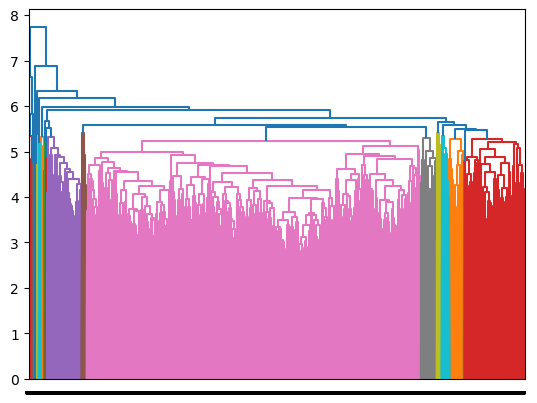

In [215]:
dend = dendrogram(link_method,labels=labellist)

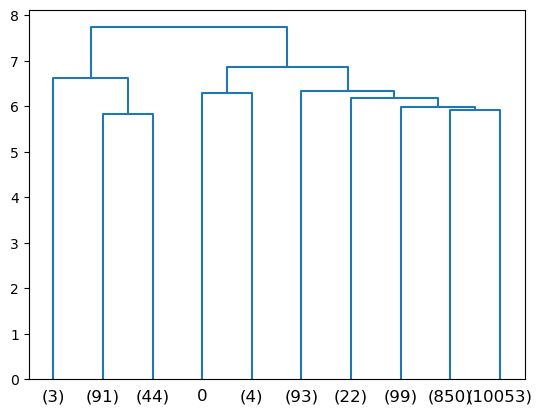

In [216]:
dend = dendrogram(link_method,
                  labels=labellist,
                 truncate_mode='lastp',
                 p=10)

In [217]:
clusters_max = fcluster(link_method,4,criterion = 'maxclust')
clusters_max

array([4, 4, 4, ..., 4, 4, 4], dtype=int32)

In [218]:
hist['clusters_max'] = clusters_max

In [219]:
hist.head().T

0         1         2         3         4
Tenure                       -0.703315 -1.153334 -1.153334 -1.153334 -1.153334
City_Tier                     1.481914 -0.709334 -0.709334  1.481914 -0.709334
CC_Contacted_LY              -1.379652 -1.146110  1.422855 -0.328712 -0.679025
Service_Score                 0.133911  0.133911 -1.253882 -1.253882 -1.253882
Account_user_count           -0.769057  0.312917  0.312917  0.312917 -0.769057
CC_Agent_Score               -0.776488 -0.047944 -0.047944  1.409143  1.409143
rev_per_month                 1.302037  0.607469  0.260185  0.954753 -0.781666
Complain_ly                   1.618461  1.618461  1.618461 -0.617871 -0.617871
rev_growth_yoy               -1.382201 -0.317551 -0.583714  1.811748 -1.382201
coupon_used_for_payment      -0.431239 -1.338515 -1.338515 -1.338515 -0.431239
Day_Since_CC_connect          0.129884 -1.301411 -0.442634 -0.442634 -0.442634
cashback                     -0.398295 -1.294067 -0.276197 -0.991804 -1.094395
Avg_Cashback_Per_User         0.088052 -1.003295 -0.479132 -0.847642 -0.389900
Churn_1                       1.000000  1.000000  1.000000  1.000000  1.000000
Payment_Credit Card           0.000000  0.000000  0.000000  0.000000  1.000000
Payment_Debit Card            1.000000  0.000000  1.000000  1.000000  0.000000
Payment_E wallet              0.000000  0.000000  0.000000  0.000000  0.000000
Payment_UPI                   0.000000  1.000000  0.000000  0.000000  0.000000
Gender_Male                   0.000000  1.000000  1.000000  1.000000  1.000000
account_segment_Regular       0.000000  0.000000  0.000000  0.000000  0.000000
account_segment_Regular +     0.000000  0.000000  0.000000  0.000000  0.000000
account_segment_Regular Plus  0.000000  1.000000  1.000000  0.000000  1.000000
account_segment_Super         1.000000  0.000000  0.000000  1.000000  0.000000
account_segment_Super +       0.000000  0.000000  0.000000  0.000000  0.000000
account_segment_Super Plus    0.000000  0.000000  0.000000  0.000000  0.000000
Marital_Status_Married        0.000000  0.000000  0.000000  0.000000  0.000000
Marital_Status_Single         1.000000  1.000000  1.000000  1.000000  1.000000
Login_device_Mobile           1.000000  1.000000  1.000000  1.000000  1.000000
clusters_max                  4.000000  4.000000  4.000000  4.000000  4.000000

In [220]:
df_hist = df1.copy()

In [221]:
df_hist['clusters_max'] = clusters_max

In [222]:
aggdata_max = hist.iloc[:,:].groupby('clusters_max').median()
aggdata_max['freq'] = hist.clusters_max.value_counts().sort_index()
aggdata_max.T

clusters_max                         1           2         3             4
Tenure                        2.109305    1.096762  2.334315     -0.140791
City_Tier                    -0.709334   -0.709334  1.481914     -0.709334
CC_Contacted_LY               0.839000   -0.445483 -0.795796     -0.211941
Service_Score                 1.521703    0.133911 -1.253882      0.133911
Account_user_count           -0.769057   -1.851031  0.312917      0.312917
CC_Agent_Score                0.680599   -0.047944  0.680599     -0.047944
rev_per_month                 2.343889   -0.087099 -0.087099     -0.087099
Complain_ly                  -0.617871   -0.617871 -0.617871     -0.617871
rev_growth_yoy               -1.116038   -0.317551  1.545586     -0.317551
coupon_used_for_payment      -0.431239   -0.431239  1.836954     -0.431239
Day_Since_CC_connect          2.849346    0.702403  2.706217     -0.442634
cashback                      2.160955    2.101513 -2.375971     -0.276197
Avg_Cashback_Per_User         1.845269    3.983998 -1.269849     -0.316246
Churn_1                       0.000000    0.000000  0.000000      0.000000
Payment_Credit Card           1.000000    0.000000  1.000000      0.000000
Payment_Debit Card            0.000000    0.000000  0.000000      0.000000
Payment_E wallet              0.000000    0.000000  0.000000      0.000000
Payment_UPI                   0.000000    0.000000  0.000000      0.000000
Gender_Male                   1.000000    1.000000  1.000000      1.000000
account_segment_Regular       1.000000    0.000000  0.000000      0.000000
account_segment_Regular +     0.000000    0.000000  0.000000      0.000000
account_segment_Regular Plus  0.000000    0.000000  0.000000      0.000000
account_segment_Super         0.000000    0.000000  0.000000      0.000000
account_segment_Super +       0.000000    0.000000  0.000000      0.000000
account_segment_Super Plus    0.000000    1.000000  1.000000      0.000000
Marital_Status_Married        0.000000    1.000000  1.000000      1.000000
Marital_Status_Single         1.000000    0.000000  0.000000      0.000000
Login_device_Mobile           1.000000    1.000000  0.000000      1.000000
freq                          3.000000  135.000000  5.000000  11117.000000

In [223]:
aggdata_max_2 = hist.iloc[:,:].groupby('clusters_max').mean()
aggdata_max_2['freq'] = hist.clusters_max.value_counts().sort_index()
aggdata_max_2.T

clusters_max                         1           2         3             4
Tenure                        2.109305    1.107596  2.559324     -0.015170
City_Tier                    -0.709334    0.110355  1.043664     -0.001618
CC_Contacted_LY               0.800076    0.025062 -0.655671     -0.000225
Service_Score                 1.521703   -0.246447 -0.698765      0.002896
Account_user_count           -1.129715   -2.075441  0.421115      0.025319
CC_Agent_Score                0.680599    0.113954 -0.047944     -0.001546
rev_per_month                 1.649321    0.190729 -0.434383     -0.002566
Complain_ly                  -0.617871    0.193835 -0.617871     -0.001909
rev_growth_yoy               -0.938597    0.029446  1.226191     -0.000656
coupon_used_for_payment       0.173613    0.072804  1.836954     -0.001757
Day_Since_CC_connect          2.849346    0.614405  2.105073     -0.009177
cashback                      1.348571    1.904994 -1.465832     -0.022838
Avg_Cashback_Per_User         1.721487    4.610245 -1.169773     -0.055923
Churn_1                       0.000000    0.051852  0.000000      0.169920
Payment_Credit Card           1.000000    0.385185  0.600000      0.310605
Payment_Debit Card            0.000000    0.400000  0.200000      0.417469
Payment_E wallet              0.000000    0.051852  0.200000      0.108752
Payment_UPI                   0.000000    0.118519  0.000000      0.072502
Gender_Male                   1.000000    0.540741  0.800000      0.605559
account_segment_Regular       0.666667    0.170370  0.000000      0.044526
account_segment_Regular +     0.000000    0.000000  0.000000      0.023568
account_segment_Regular Plus  0.000000    0.014815  0.000000      0.347216
account_segment_Super         0.333333    0.014815  0.400000      0.373662
account_segment_Super +       0.000000    0.014815  0.000000      0.004048
account_segment_Super Plus    0.000000    0.666667  0.600000      0.060988
Marital_Status_Married        0.000000    0.592593  0.800000      0.538635
Marital_Status_Single         1.000000    0.281481  0.000000      0.312944
Login_device_Mobile           1.000000    0.800000  0.000000      0.731402
freq                          3.000000  135.000000  5.000000  11117.000000

# KMeans Clustering

In [224]:
kmeans=scaled_df1_encoded.copy()

In [225]:
k_means = KMeans(n_clusters = 2)

In [226]:
k_means.fit(kmeans)

KMeans(n_clusters=2)

In [227]:
k_means.labels_

array([0, 0, 0, ..., 1, 1, 1])

In [228]:
k_means.inertia_

154649.27550666136

In [229]:
k_means = KMeans(n_clusters = 3)
k_means.fit(kmeans)
k_means.inertia_

143888.01990733467

In [230]:
k_means = KMeans(n_clusters = 4)
k_means.fit(kmeans)
k_means.inertia_

137508.7993456369

In [231]:
k_means = KMeans(n_clusters = 5)
k_means.fit(kmeans)
k_means.inertia_

131508.80790236534

In [232]:
wss =[] 
for i in range(1,20):
    k_means = KMeans(n_clusters=i)
    k_means.fit(kmeans)
    wss.append(k_means.inertia_)

In [233]:
wss

[171752.35373001784,
 154649.2854165271,
 143887.8890284607,
 137305.5437094653,
 131509.99299623218,
 127392.19654412687,
 124122.29060203984,
 121470.52921118318,
 119068.24914482077,
 116814.65157345231,
 114843.22285133385,
 112950.06508898945,
 111302.7166007421,
 110319.54101541021,
 108413.70117304177,
 107372.93724461732,
 105918.42970149955,
 105128.41984274187,
 103988.08493177094]

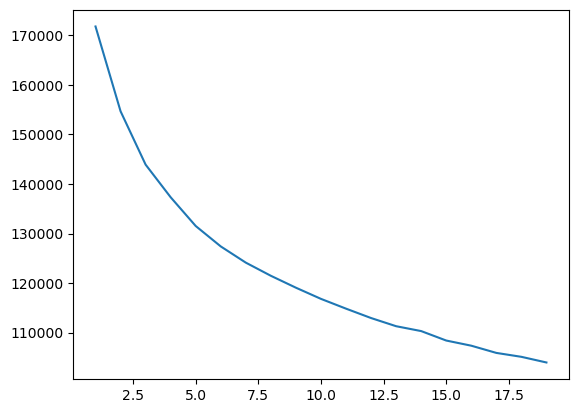

In [234]:
plt.plot(range(1,20), wss);

In [235]:
Sil_Score = []
for i in range(2,20):
  k_means = KMeans(n_clusters=i)
  k_means.fit(kmeans)
  labels = k_means.labels_
  ss = silhouette_score(kmeans,labels)
  Sil_Score.append(ss)

In [236]:
k_means = KMeans(n_clusters = 4)
k_means.fit(kmeans)
labels = k_means.labels_

In [237]:
kmeans["Clus_kmeans"] = labels
kmeans.head(10).T

0         1         2         3  \
Tenure                       -0.703315 -1.153334 -1.153334 -1.153334   
City_Tier                     1.481914 -0.709334 -0.709334  1.481914   
CC_Contacted_LY              -1.379652 -1.146110  1.422855 -0.328712   
Service_Score                 0.133911  0.133911 -1.253882 -1.253882   
Account_user_count           -0.769057  0.312917  0.312917  0.312917   
CC_Agent_Score               -0.776488 -0.047944 -0.047944  1.409143   
rev_per_month                 1.302037  0.607469  0.260185  0.954753   
Complain_ly                   1.618461  1.618461  1.618461 -0.617871   
rev_growth_yoy               -1.382201 -0.317551 -0.583714  1.811748   
coupon_used_for_payment      -0.431239 -1.338515 -1.338515 -1.338515   
Day_Since_CC_connect          0.129884 -1.301411 -0.442634 -0.442634   
cashback                     -0.398295 -1.294067 -0.276197 -0.991804   
Avg_Cashback_Per_User         0.088052 -1.003295 -0.479132 -0.847642   
Churn_1                       1.000000  1.000000  1.000000  1.000000   
Payment_Credit Card           0.000000  0.000000  0.000000  0.000000   
Payment_Debit Card            1.000000  0.000000  1.000000  1.000000   
Payment_E wallet              0.000000  0.000000  0.000000  0.000000   
Payment_UPI                   0.000000  1.000000  0.000000  0.000000   
Gender_Male                   0.000000  1.000000  1.000000  1.000000   
account_segment_Regular       0.000000  0.000000  0.000000  0.000000   
account_segment_Regular +     0.000000  0.000000  0.000000  0.000000   
account_segment_Regular Plus  0.000000  1.000000  1.000000  0.000000   
account_segment_Super         1.000000  0.000000  0.000000  1.000000   
account_segment_Super +       0.000000  0.000000  0.000000  0.000000   
account_segment_Super Plus    0.000000  0.000000  0.000000  0.000000   
Marital_Status_Married        0.000000  0.000000  0.000000  0.000000   
Marital_Status_Single         1.000000  1.000000  1.000000  1.000000   
Login_device_Mobile           1.000000  1.000000  1.000000  1.000000   
Clus_kmeans                   3.000000  3.000000  3.000000  3.000000   

                                     4         5         6         7  \
Tenure                       -1.153334 -1.153334 -0.928324 -1.153334   
City_Tier                    -0.709334 -0.709334  1.481914 -0.709334   
CC_Contacted_LY              -0.679025  0.488686 -0.795796 -1.379652   
Service_Score                -1.253882  0.133911 -1.253882  0.133911   
Account_user_count           -0.769057  0.312917 -0.769057 -0.769057   
CC_Agent_Score                1.409143  1.409143 -0.776488 -0.776488   
rev_per_month                -0.781666 -1.128950 -0.434383 -0.781666   
Complain_ly                  -0.617871  1.618461 -0.617871  1.618461   
rev_growth_yoy               -1.382201  1.545586 -0.583714 -0.051389   
coupon_used_for_payment      -0.431239  1.836954 -1.338515  0.476038   
Day_Since_CC_connect         -0.442634  0.702403 -1.301411 -1.301411   
cashback                     -1.094395 -0.874296 -1.294985 -1.247477   
Avg_Cashback_Per_User        -0.389900 -0.787130 -0.527629 -0.495009   
Churn_1                       1.000000  1.000000  1.000000  1.000000   
Payment_Credit Card           1.000000  0.000000  0.000000  1.000000   
Payment_Debit Card            0.000000  1.000000  0.000000  0.000000   
Payment_E wallet              0.000000  0.000000  0.000000  0.000000   
Payment_UPI                   0.000000  0.000000  0.000000  0.000000   
Gender_Male                   1.000000  0.000000  1.000000  1.000000   
account_segment_Regular       0.000000  0.000000  0.000000  0.000000   
account_segment_Regular +     0.000000  0.000000  0.000000  0.000000   
account_segment_Regular Plus  1.000000  1.000000  0.000000  1.000000   
account_segment_Super         0.000000  0.000000  1.000000  0.000000   
account_segment_Super +       0.000000  0.000000  0.000000  0.000000   
account_segment_Super Plus    0.000000  0.000000  0.000000  0.000000   
Mari

In [238]:
aggdata_k = kmeans.iloc[:,:].groupby('Clus_kmeans').mean()
aggdata_k['freq'] = kmeans.Clus_kmeans.value_counts().sort_index()
aggdata_k.T

Clus_kmeans                             0            1            2  \
Tenure                          -0.024288     1.054475    -0.196859   
City_Tier                       -0.124208    -0.077745     0.053151   
CC_Contacted_LY                  0.057221    -0.066759     0.135019   
Service_Score                   -0.044187     0.011600     0.654090   
Account_user_count              -2.018187     0.182371     0.659720   
CC_Agent_Score                   0.054181     0.009934     0.002247   
rev_per_month                   -0.046645     0.260875     0.130015   
Complain_ly                      0.020135    -0.011596    -0.007345   
rev_growth_yoy                   0.077094    -0.045838     0.186865   
coupon_used_for_payment         -0.141949     0.516582     0.422644   
Day_Since_CC_connect             0.063053     0.695509     0.058320   
cashback                         0.051888     1.574162    -0.137821   
Avg_Cashback_Per_User            2.251646     0.655001    -0.526029   
Churn_1                          0.091807     0.062066     0.206679   
Payment_Credit Card              0.359329     0.334657     0.297057   
Payment_Debit Card               0.435341     0.403178     0.419197   
Payment_E wallet                 0.061204     0.123635     0.109762   
Payment_UPI                      0.077986     0.052135     0.081738   
Gender_Male                      0.637710     0.579940     0.602989   
account_segment_Regular          0.028628     0.236346     0.002102   
account_segment_Regular +        0.006910     0.000000     0.028725   
account_segment_Regular Plus     0.369200     0.011420     0.373891   
account_segment_Super            0.371175     0.075968     0.477347   
account_segment_Super +          0.001974     0.022344     0.000000   
account_segment_Super Plus       0.104640     0.319265     0.003503   
Marital_Status_Married           0.610069     0.591857     0.534563   
Marital_Status_Single            0.256663     0.229891     0.320411   
Login_device_Mobile              0.753208     0.762661     0.719757   
freq                          1013.000000  2014.000000  4282.000000   

Clus_kmeans                             3  
Tenure                          -0.317934  
City_Tier                        0.013872  
CC_Contacted_LY                 -0.126971  
Service_Score                   -0.703471  
Account_user_count              -0.290507  
CC_Agent_Score                  -0.021391  
rev_per_month                   -0.261927  
Complain_ly                      0.008709  
rev_growth_yoy                  -0.198920  
coupon_used_for_payment         -0.684982  
Day_Since_CC_connect            -0.433903  
cashback                        -0.666357  
Avg_Cashback_Per_User           -0.341087  
Churn_1                          0.200709  
Payment_Credit Card              0.303974  
Payment_Debit Card               0.417110  
Payment_E wallet                 0.110352  
Payment_UPI                      0.072893  
Gender_Male                      0.611491  
account_segment_Regular          0.001519  
account_segment_Regular +        0.033409  
account_segment_Regular Plus     0.471779  
account_segment_Super            0.401417  
account_segment_Super +          0.000000  
account_segment_Super Plus       0.001772  
Marital_Status_Married           0.499367  
Marital_Status_Single            0.360668  
Login_device_Mobile              0.724120  
freq                          3951.000000

In [239]:
df_k = df1.copy()

In [240]:
df_k['Clus_kmeans'] = kmeans["Clus_kmeans"]

In [241]:
aggdata_k2 = df_k.iloc[:,:].groupby('Clus_kmeans').mean()
aggdata_k2['freq'] = df_k.Clus_kmeans.value_counts().sort_index()
aggdata_k2.T

Clus_kmeans                        0            1            2            3
Tenure                     10.035538    19.624131     8.501635     7.425462
City_Tier                   1.534057     1.576465     1.695936     1.660086
CC_Contacted_LY            18.305035    17.243297    18.971275    16.727664
Service_Score               2.871668     2.911867     3.374825     2.396608
Account_user_count          1.845508     3.879345     4.320528     3.442293
CC_Agent_Score              3.140178     3.079444     3.068893     3.036446
rev_per_month               5.116486     6.001986     5.625175     4.496583
Complain_ly                 0.285291     0.271102     0.273003     0.280182
rev_growth_yoy             16.482725    16.020854    16.895142    15.445710
coupon_used_for_payment     1.318855     2.044687     1.941149     0.720324
Day_Since_CC_connect        4.766535     6.975919     4.750000     3.030499
cashback                  179.545104   245.872637   171.279229   148.250172
Avg_Cashback_Per_User      99.075995    65.302540    40.320497    44.232544
freq                     1013.000000  2014.000000  4282.000000  3951.000000

# Oversampling and Smote

In [242]:
scaled_df1_encoded

Tenure  City_Tier  CC_Contacted_LY  Service_Score  \
0     -0.703315   1.481914        -1.379652       0.133911   
1     -1.153334  -0.709334        -1.146110       0.133911   
2     -1.153334  -0.709334         1.422855      -1.253882   
3     -1.153334   1.481914        -0.328712      -1.253882   
4     -1.153334  -0.709334        -0.679025      -1.253882   
...         ...        ...              ...            ...   
11255 -0.028286  -0.709334         1.889940       0.133911   
11256  0.309228  -0.709334         0.138373       0.133911   
11257 -1.040829  -0.709334        -0.445483       0.133911   
11258  1.434276   1.481914        -0.795796       1.521703   
11259 -0.253296  -0.709334         0.488686       0.133911   

       Account_user_count  CC_Agent_Score  rev_per_month  Complain_ly  \
0               -0.769057       -0.776488       1.302037     1.618461   
1                0.312917       -0.047944       0.607469     1.618461   
2                0.312917       -0.047944       0.260185     1.618461   
3                0.312917        1.409143       0.954753    -0.617871   
4               -0.769057        1.409143      -0.781666    -0.617871   
...                   ...             ...            ...          ...   
11255           -1.851031       -1.505031       1.302037    -0.617871   
11256            1.394891        1.409143       0.607469    -0.617871   
11257           -1.851031        0.680599       0.607469     1.618461   
11258            1.394891        0.680599       0.607469    -0.617871   
11259           -1.851031       -0.047944      -0.087099    -0.617871   

       rev_growth_yoy  coupon_used_for_payment  ...  Gender_Male  \
0           -1.382201                -0.431239  ...            0   
1           -0.317551                -1.338515  ...            1   
2           -0.583714                -1.338515  ...            1   
3            1.811748                -1.338515  ...            1   
4           -1.382201                -0.431239  ...            1   
...               ...                      ...  ...          ...   
11255        0.747099                -0.431239  ...            1   
11256       -0.051389                -0.431239  ...            1   
11257        1.545586                -0.431239  ...            1   
11258       -0.051389                 0.476038  ...            1   
11259       -0.849876                 0.476038  ...            1   

       account_segment_Regular  account_segment_Regular +  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   
...                        ...                        ...   
11255                        0                          0   
11256                        0                          0   
11257                        0                          0   
11258                        0                          0   
11259                        0                          0   

       account_segment_Regular Plus  account_segment_Super  \
0                                 0                      1   
1                                 1                      0   
2                                 1                      0   
3                                 0                      1   
4                                 1                      0   
...                             ...                    ...   
11255                             0                      1   
11256                             0                      0   
11257                             0                      1   
11258                             0                      1   
11259                             0                      1   

       account_segment_Super +  account_segment_Super Plus  \
0                            0

In [243]:
hist['clusters_max'] = hist['clusters_max'].astype('object')

In [244]:
hist1 = pd.get_dummies(hist, drop_first=True)

In [245]:
X=hist1.drop(['Churn_1'],axis=1)
y=hist1['Churn_1']

In [246]:
print('Before OverSampling, the shape of X: {}'.format(X.shape)) 
print('Before OverSampling, the shape of y: {} \n'.format(y.shape)) 
  
print("Before OverSampling, counts of label '1': {}".format(sum(y == 1))) 
print("Before OverSampling, counts of label '0': {}".format(sum(y == 0)))

Before OverSampling, the shape of X: (11260, 30)
Before OverSampling, the shape of y: (11260,) 

Before OverSampling, counts of label '1': 1896
Before OverSampling, counts of label '0': 9364


In [247]:
sm = SMOTE(random_state=33)
X_res, y_res = sm.fit_resample(X, y.ravel())

In [248]:
print('After OverSampling, the shape of X: {}'.format(X_res.shape)) 
print('After OverSampling, the shape of y: {} \n'.format(y_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_res == 0)))

After OverSampling, the shape of X: (18728, 30)
After OverSampling, the shape of y: (18728,) 

After OverSampling, counts of label '1': 9364
After OverSampling, counts of label '0': 9364


In [249]:
X_res=pd.DataFrame(X_res)
#Renaming column name of Target variable
y_res=pd.DataFrame(y_res)
y_res.columns = ['Churn_1']
scaled_df_encoded_h1_smote = pd.concat([X_res,y_res], axis=1)

In [250]:
X = scaled_df_encoded_h1_smote.drop(['Churn_1'],axis=1)
y = scaled_df_encoded_h1_smote['Churn_1']
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.70, random_state=1)

# Logistic Regression

In [251]:
LogisticRegression

sklearn.linear_model._logistic.LogisticRegression

In [252]:
tuned_parameters = {'C': [0.1, 0.5, 1, 5, 10, 50, 100]}
clf = GridSearchCV(LogisticRegression(solver='liblinear'), tuned_parameters, cv=3, scoring="accuracy")
clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.1, 0.5, 1, 5, 10, 50, 100]},
             scoring='accuracy')

In [253]:
model_lor = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='l2',verbose=True,n_jobs=-1)
model_lor.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.8s finished


LogisticRegression(max_iter=10000, n_jobs=-1, solver='newton-cg', verbose=True)

In [254]:
ytrain_predict = model_lor.predict(X_train)
ytest_predict = model_lor.predict(X_test)

In [255]:
ytest_predict_prob=model_lor.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

0         1
0  0.373853  0.626147
1  0.190950  0.809050
2  0.882534  0.117466
3  0.876481  0.123519
4  0.767634  0.232366

In [256]:
model_lor.score(X_train, y_train)

0.8135632008543748

AUC: 0.891


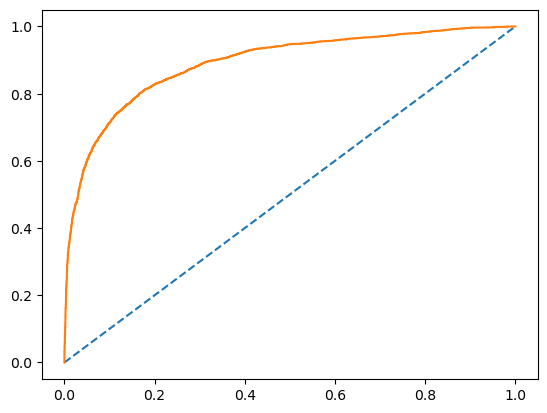

In [257]:
probs = model_lor.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [258]:
model_lor.score(X_test, y_test)

0.8177611674675209

AUC: 0.891


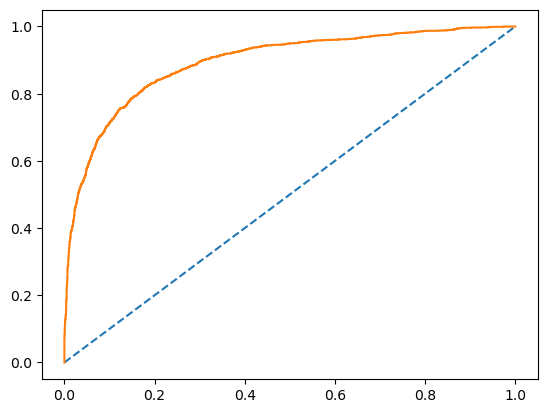

In [259]:
probs = model_lor.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

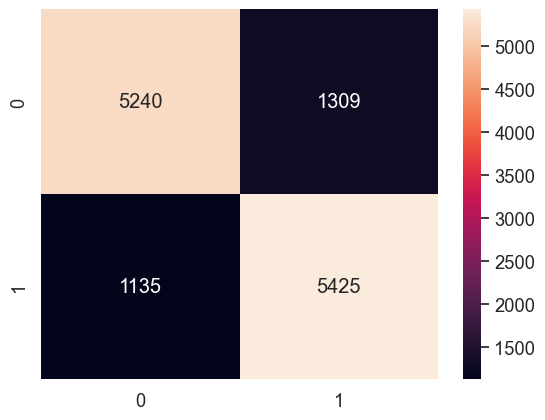

In [260]:
#confusion matrix training Data
cm_lr = confusion_matrix(y_train, ytrain_predict)
cm_lr
sns.set(font_scale = 1.2)
sns.heatmap(cm_lr,annot = True,fmt = 'd');

In [261]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      6549
           1       0.81      0.83      0.82      6560

    accuracy                           0.81     13109
   macro avg       0.81      0.81      0.81     13109
weighted avg       0.81      0.81      0.81     13109



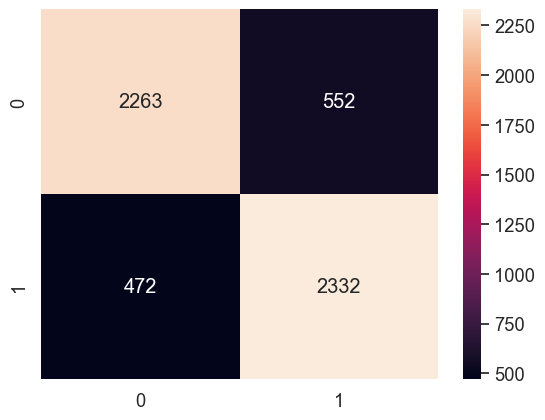

In [262]:
#confusion matrix test Data
cm_test_lr=confusion_matrix(y_test, ytest_predict)
cm_test_lr
sns.set(font_scale = 1.2)
sns.heatmap(cm_test_lr,annot = True,fmt = 'd');

In [263]:
#Test Data Accuracy
test_acc=model_lor.score(X_test,y_test)
test_acc

0.8177611674675209

In [264]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82      2815
           1       0.81      0.83      0.82      2804

    accuracy                           0.82      5619
   macro avg       0.82      0.82      0.82      5619
weighted avg       0.82      0.82      0.82      5619



# LDA

In [265]:
LDA_model= LinearDiscriminantAnalysis()

In [266]:
LDA_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

0.8096727439163933
              precision    recall  f1-score   support

           0       0.83      0.79      0.80      6549
           1       0.80      0.83      0.81      6560

    accuracy                           0.81     13109
   macro avg       0.81      0.81      0.81     13109
weighted avg       0.81      0.81      0.81     13109



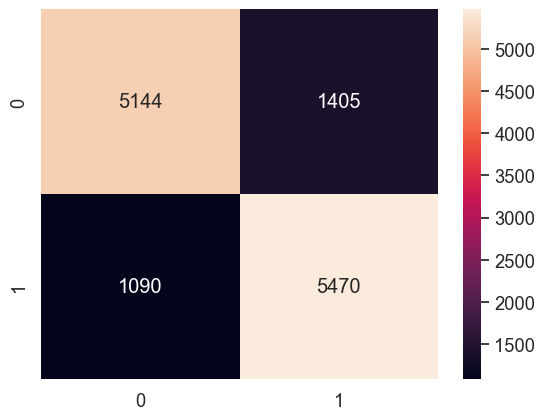

In [267]:
## Performance Matrix on train data set
y_train_predict = LDA_model.predict(X_train)
model_score = LDA_model.score(X_train, y_train)
print(model_score)
#confusion matrix training Data
cm_train_lda = confusion_matrix(y_train, y_train_predict)
sns.set(font_scale = 1.2)
sns.heatmap(cm_train_lda, annot = True,fmt = 'd')
print(metrics.classification_report(y_train, y_train_predict))

0.8138458800498309
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      2815
           1       0.80      0.84      0.82      2804

    accuracy                           0.81      5619
   macro avg       0.81      0.81      0.81      5619
weighted avg       0.81      0.81      0.81      5619



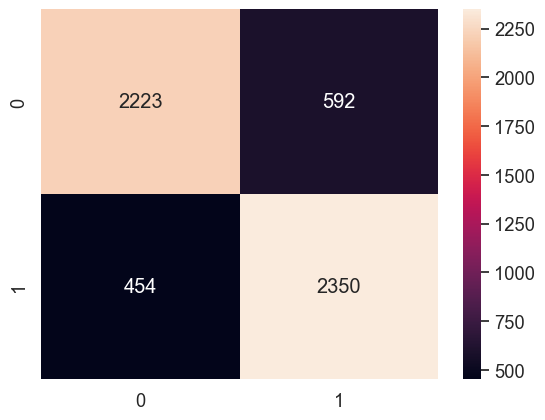

In [268]:
## Performance Matrix on test data set
y_test_predict = LDA_model.predict(X_test)
model_score = LDA_model.score(X_test, y_test)
print(model_score)
#confusion matrix test Data
cm_test_lda = confusion_matrix(y_test, y_test_predict)
sns.set(font_scale = 1.2)
sns.heatmap(cm_test_lda, annot = True,fmt = 'd')
print(metrics.classification_report(y_test, y_test_predict))

AUC: 0.890


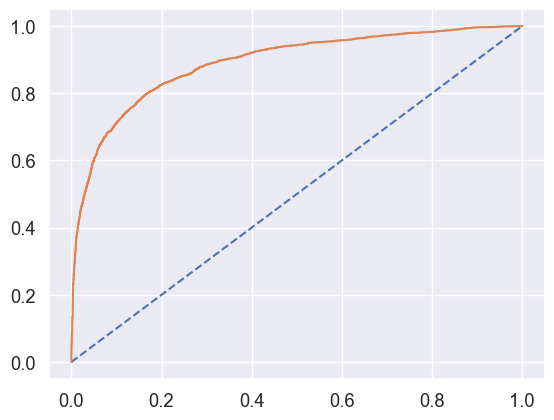

In [269]:
# predict probabilities
probs = LDA_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.890


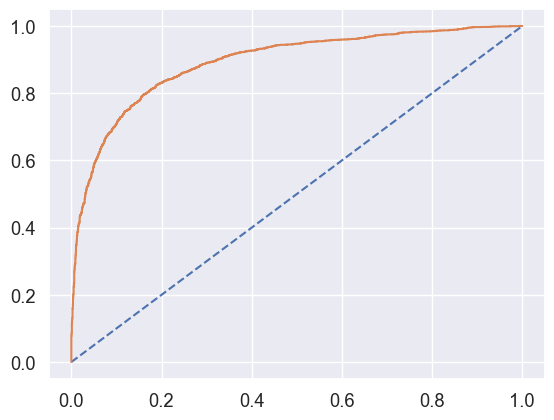

In [270]:
# predict probabilities
probs = LDA_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

# Decision Tree

In [271]:
DT_model= tree.DecisionTreeClassifier()
DT_model.fit(X_train, y_train)

DecisionTreeClassifier()

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6549
           1       1.00      1.00      1.00      6560

    accuracy                           1.00     13109
   macro avg       1.00      1.00      1.00     13109
weighted avg       1.00      1.00      1.00     13109



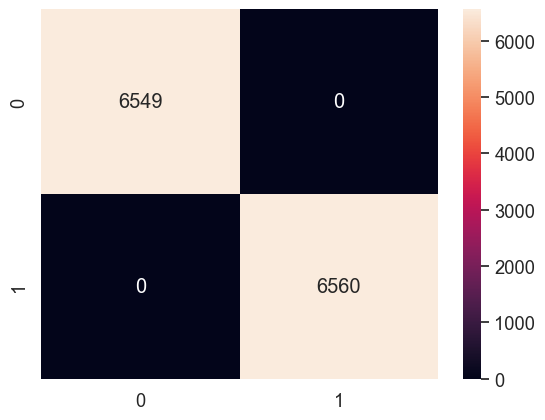

In [272]:
## Performance Matrix on train data set
y_train_predict = DT_model.predict(X_train)
model_score = DT_model.score(X_train, y_train)
print(model_score)
print(metrics.classification_report(y_train, y_train_predict))
#confusion matrix training Data
cm_train_dt = confusion_matrix(y_train, y_train_predict)
sns.set(font_scale = 1.2)
sns.heatmap(cm_train_dt, annot = True,fmt = 'd');

0.9556860651361452
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      2815
           1       0.95      0.96      0.96      2804

    accuracy                           0.96      5619
   macro avg       0.96      0.96      0.96      5619
weighted avg       0.96      0.96      0.96      5619

Confusion Matrix


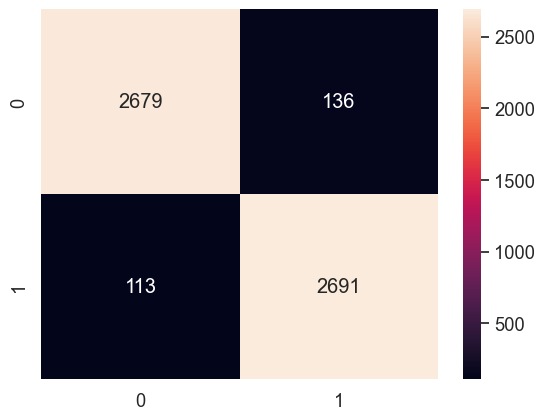

In [273]:
## Performance Matrix on test data set
y_test_predict = DT_model.predict(X_test)
model_score = DT_model.score(X_test, y_test)
print(model_score)
print(metrics.classification_report(y_test, y_test_predict))
#confusion matrix test Data
cm_test_dt = confusion_matrix(y_test, y_test_predict)
sns.set(font_scale = 1.2)
print('Confusion Matrix')
sns.heatmap(cm_test_dt, annot = True,fmt = 'd');

AUC: 1.000


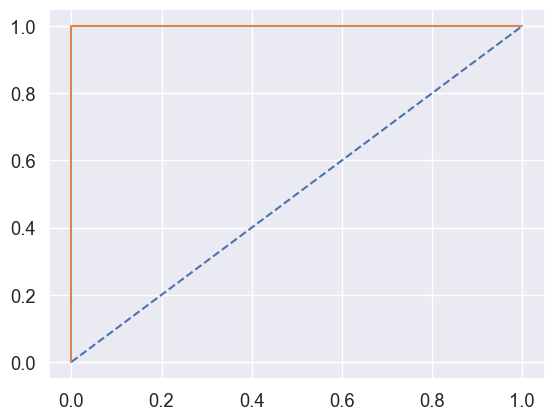

In [274]:
# predict probabilities
probs = DT_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 1.000


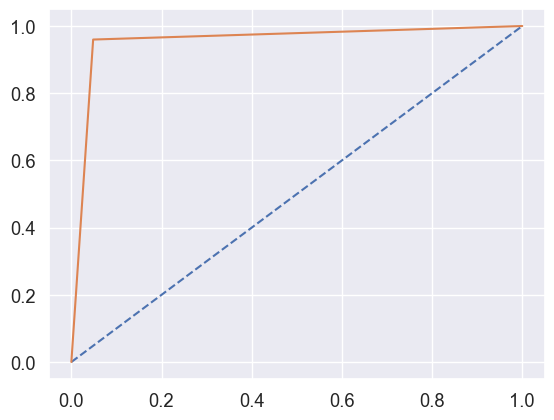

In [275]:
# predict probabilities
probs = DT_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

# Random Forest

In [276]:
RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6549
           1       1.00      1.00      1.00      6560

    accuracy                           1.00     13109
   macro avg       1.00      1.00      1.00     13109
weighted avg       1.00      1.00      1.00     13109

Confusion Matrix


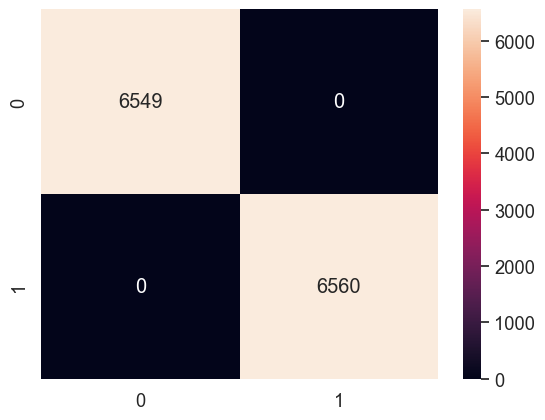

In [277]:
## Performance Matrix on train data set
y_train_predict = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print(model_score)
print(metrics.classification_report(y_train, y_train_predict))
#confusion matrix training Data
cm_train_rf = confusion_matrix(y_train, y_train_predict)
print('Confusion Matrix')
sns.set(font_scale = 1.2)
sns.heatmap(cm_train_rf, annot = True,fmt = 'd');

0.9846947855490301
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2815
           1       0.98      0.99      0.98      2804

    accuracy                           0.98      5619
   macro avg       0.98      0.98      0.98      5619
weighted avg       0.98      0.98      0.98      5619

Confusion Matrix


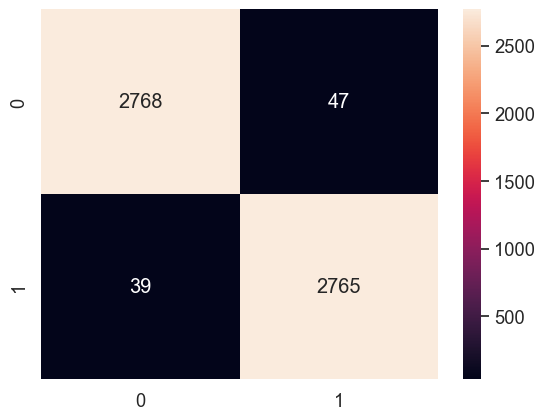

In [278]:
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)
print(metrics.classification_report(y_test, y_test_predict))
#confusion matrix test Data
cm_test_rf = confusion_matrix(y_test, y_test_predict)
sns.set(font_scale = 1.2)
print('Confusion Matrix')
sns.heatmap(cm_test_rf, annot = True,fmt = 'd');

AUC: 1.000


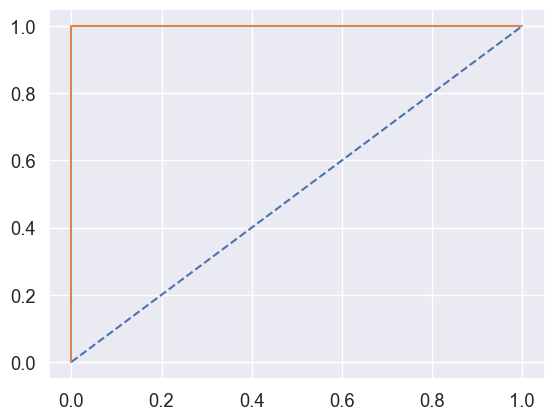

In [279]:
# predict probabilities
probs = RF_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 1.000


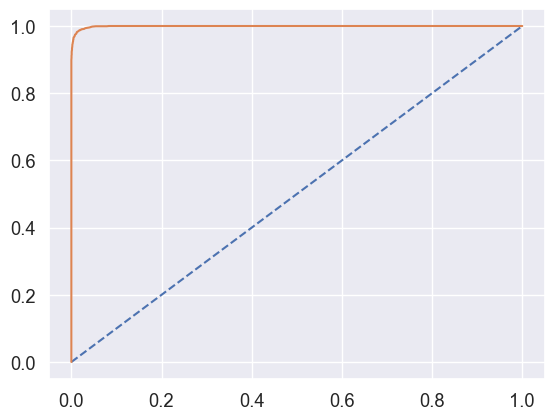

In [280]:
# predict probabilities
probs = RF_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

# MLP Classifier

In [281]:
clf = MLPClassifier(hidden_layer_sizes=100, max_iter=5000,
                     solver='sgd', verbose=True,  random_state=21,tol=0.01)

In [282]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Iteration 1, loss = 0.69592828
Iteration 2, loss = 0.62414603
Iteration 3, loss = 0.57841717
Iteration 4, loss = 0.54733084
Iteration 5, loss = 0.52479986
Iteration 6, loss = 0.50782171
Iteration 7, loss = 0.49471970
Iteration 8, loss = 0.48429395
Iteration 9, loss = 0.47592154
Iteration 10, loss = 0.46902106
Iteration 11, loss = 0.46318397
Iteration 12, loss = 0.45826264
Iteration 13, loss = 0.45398251
Iteration 14, loss = 0.45027667
Iteration 15, loss = 0.44698922
Iteration 16, loss = 0.44408085
Iteration 17, loss = 0.44140519
Iteration 18, loss = 0.43901610
Iteration 19, loss = 0.43679906
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.


In [283]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[2256,  559],
       [ 531, 2273]], dtype=int64)

In [284]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81      2815
           1       0.80      0.81      0.81      2804

    accuracy                           0.81      5619
   macro avg       0.81      0.81      0.81      5619
weighted avg       0.81      0.81      0.81      5619



AUC: 0.886


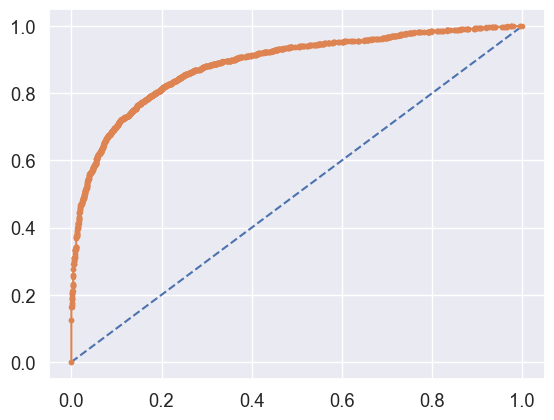

In [285]:
# AUC and ROC for the test data

# predict probabilities
probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [286]:
pred2 = clf.predict(X_train)
confusion_matrix(y_train,pred2)

array([[5249, 1300],
       [1219, 5341]], dtype=int64)

In [287]:
print(classification_report(y_train, pred2))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81      6549
           1       0.80      0.81      0.81      6560

    accuracy                           0.81     13109
   macro avg       0.81      0.81      0.81     13109
weighted avg       0.81      0.81      0.81     13109



AUC: 0.884


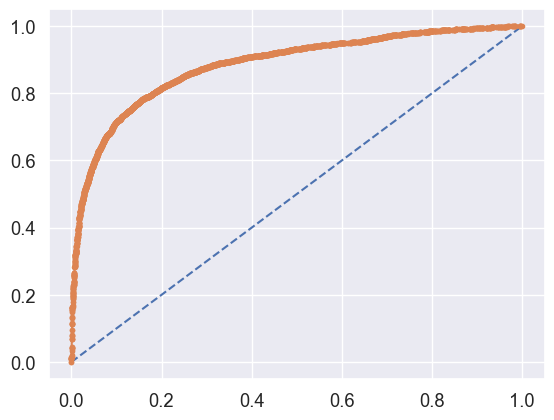

In [288]:
# AUC and ROC for the training data

# predict probabilities
probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# KNN

In [289]:
KNN_model=KNeighborsClassifier(algorithm= 'auto', leaf_size=30, metric='minkowski',
                           metric_params=None, n_jobs=None, p=2,
                           n_neighbors= 5 , weights = 'uniform')
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [290]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

predicted_labels = KNN_model.predict(X_test)
KNN_model.score(X_test, y_test)

0.9640505428012102

In [291]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9807002822488367
[[6302  247]
 [   6 6554]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      6549
           1       0.96      1.00      0.98      6560

    accuracy                           0.98     13109
   macro avg       0.98      0.98      0.98     13109
weighted avg       0.98      0.98      0.98     13109



In [292]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9640505428012102
[[2621  194]
 [   8 2796]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      2815
           1       0.94      1.00      0.97      2804

    accuracy                           0.96      5619
   macro avg       0.97      0.96      0.96      5619
weighted avg       0.97      0.96      0.96      5619



In [293]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,12,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # evaluate test accuracy
    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.011923829862964919,
 0.02366969211603487,
 0.035949457198789836,
 0.0507207688200747,
 0.06068695497419474,
 0.07136501156789465]

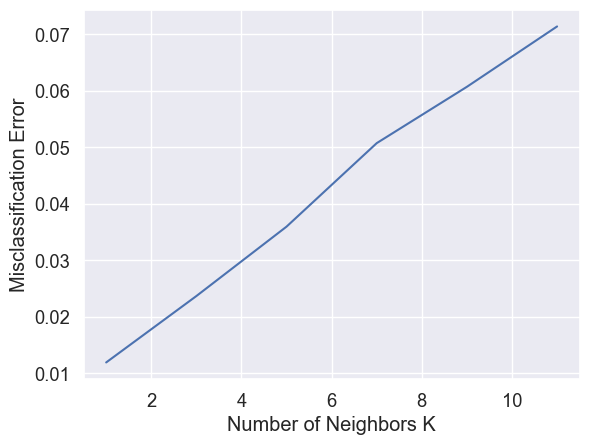

In [294]:
# plot misclassification error vs k
plt.plot(range(1,12,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

**As the difference between train and test accuracies is less than 10%, it is a valid model**

AUC: 1.000


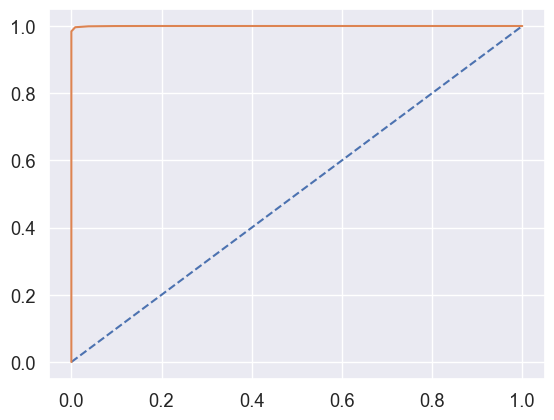

In [295]:
# Train Model Roc_AUC SCore
# predict probabilities
probs = KNN_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.995


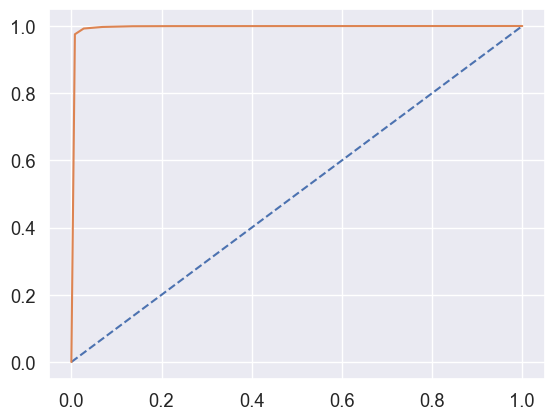

In [296]:
# Test Model Roc_AUC SCore
# predict probabilities
probs = KNN_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

# Gaussian NB

In [297]:
NB_model = GaussianNB(priors=None, var_smoothing=1e-09)
NB_model.fit(X_train, y_train)

GaussianNB()

In [298]:
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)                      ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))          ## confusion_matrix
print(metrics.classification_report(y_train, y_train_predict))     ## classification_report

0.5573270272331986
[[1036 5513]
 [ 290 6270]]
              precision    recall  f1-score   support

           0       0.78      0.16      0.26      6549
           1       0.53      0.96      0.68      6560

    accuracy                           0.56     13109
   macro avg       0.66      0.56      0.47     13109
weighted avg       0.66      0.56      0.47     13109



In [299]:
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)                    ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))         ## confusion_matrix
print(metrics.classification_report(y_test, y_test_predict))    ## classification_report

0.5563267485317672
[[ 435 2380]
 [ 113 2691]]
              precision    recall  f1-score   support

           0       0.79      0.15      0.26      2815
           1       0.53      0.96      0.68      2804

    accuracy                           0.56      5619
   macro avg       0.66      0.56      0.47      5619
weighted avg       0.66      0.56      0.47      5619



In [300]:
NB_model.score(X_train, y_train)

0.5573270272331986

In [301]:
NB_model.score(X_test, y_test)

0.5563267485317672

AUC: 0.814


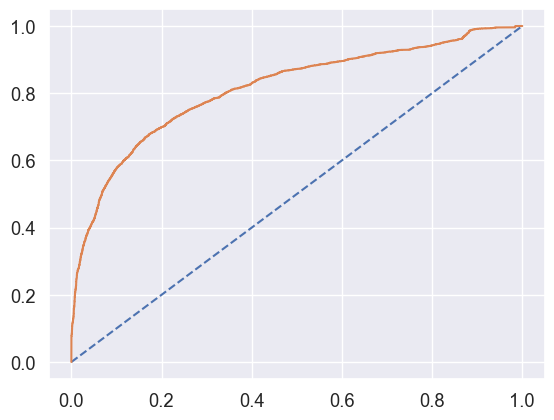

In [302]:
# Train Model Roc_AUC SCore
# predict probabilities
probs = NB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.815


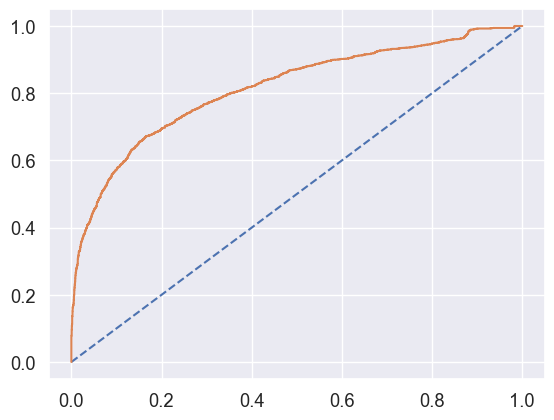

In [303]:
# Test Model Roc_AUC SCore
# predict probabilities
probs = NB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

# Bagging Random Forest Classifier

In [304]:
cart = RandomForestClassifier(n_estimators=100, random_state=1)
Bagging_model = BaggingClassifier(estimator=cart, n_estimators=100, random_state=1)
Bagging_model.fit(X_train, y_train)


BaggingClassifier(estimator=RandomForestClassifier(random_state=1),
                  n_estimators=100, random_state=1)

In [305]:
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9996185826531391
[[6547    2]
 [   3 6557]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6549
           1       1.00      1.00      1.00      6560

    accuracy                           1.00     13109
   macro avg       1.00      1.00      1.00     13109
weighted avg       1.00      1.00      1.00     13109



AUC: 1.000


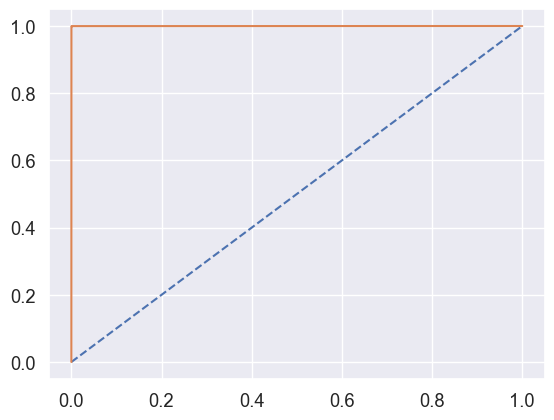

In [306]:
# Train Model Roc_AUC SCore
# predict probabilities
probs = Bagging_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [307]:
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9772201459334401
[[2740   75]
 [  53 2751]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2815
           1       0.97      0.98      0.98      2804

    accuracy                           0.98      5619
   macro avg       0.98      0.98      0.98      5619
weighted avg       0.98      0.98      0.98      5619



AUC: 0.998


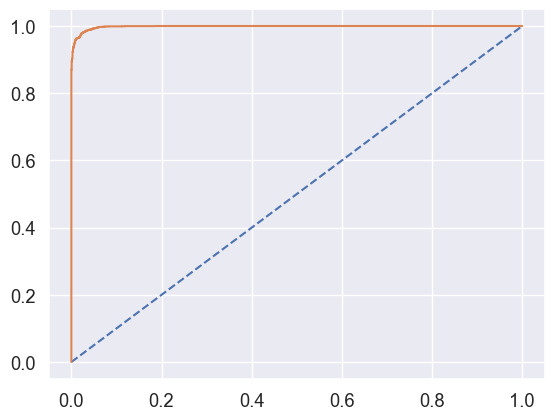

In [308]:
# Test Model Roc_AUC SCore
# predict probabilities
probs = Bagging_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

0.9772201459334401


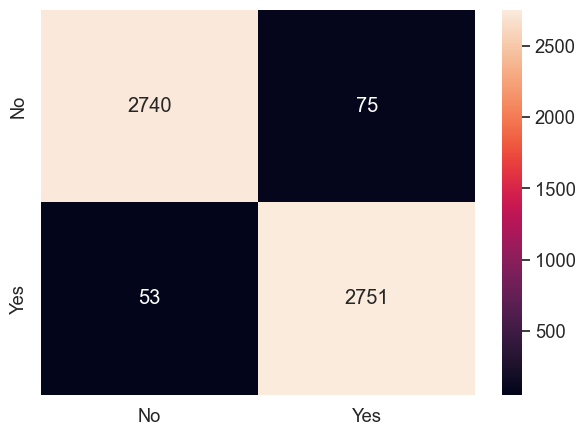

In [309]:
y_predict = Bagging_model.predict(X_test)

print(Bagging_model.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g');

# ADA Boosting

In [310]:
ADB_model = AdaBoostClassifier(algorithm='SAMME.R', learning_rate=1.0, n_estimators=100, random_state=1)

ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [311]:
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8888549851247235
[[5855  694]
 [ 763 5797]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      6549
           1       0.89      0.88      0.89      6560

    accuracy                           0.89     13109
   macro avg       0.89      0.89      0.89     13109
weighted avg       0.89      0.89      0.89     13109



AUC: 0.960


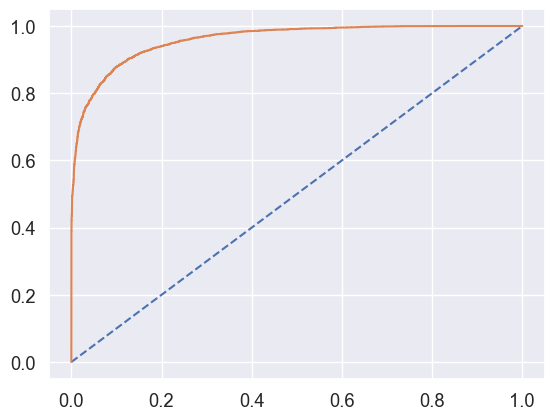

In [312]:
# Train Model Roc_AUC SCore
# predict probabilities
probs = ADB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [313]:
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8875244705463605
[[2523  292]
 [ 340 2464]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      2815
           1       0.89      0.88      0.89      2804

    accuracy                           0.89      5619
   macro avg       0.89      0.89      0.89      5619
weighted avg       0.89      0.89      0.89      5619



AUC: 0.957


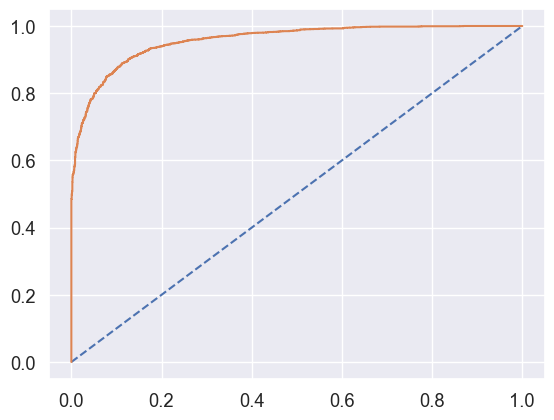

In [314]:
# Test Model Roc_AUC SCore
# predict probabilities
probs = ADB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

0.8875244705463605


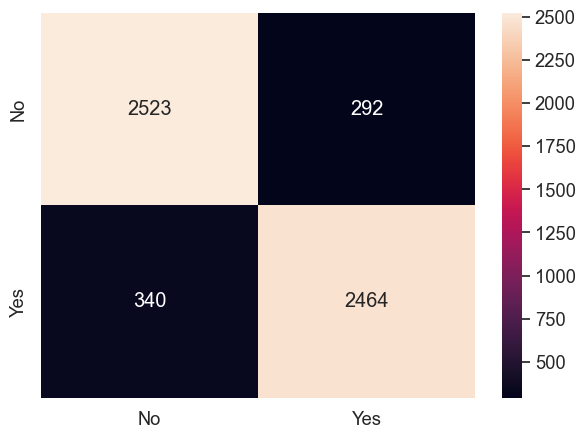

In [315]:
y_predict = ADB_model.predict(X_test)
print(ADB_model.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g');

In [316]:
gbcl = GradientBoostingClassifier(random_state=1,learning_rate=0.1, min_samples_split=50,
                                  min_samples_leaf=5,max_depth=4,max_features='sqrt',
                                  subsample=0.08)
gbcl = gbcl.fit(X_train, y_train)

In [317]:
y_train_predict = gbcl.predict(X_train)
model_score = gbcl.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9103669234876802
[[5981  568]
 [ 607 5953]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      6549
           1       0.91      0.91      0.91      6560

    accuracy                           0.91     13109
   macro avg       0.91      0.91      0.91     13109
weighted avg       0.91      0.91      0.91     13109



AUC: 0.971


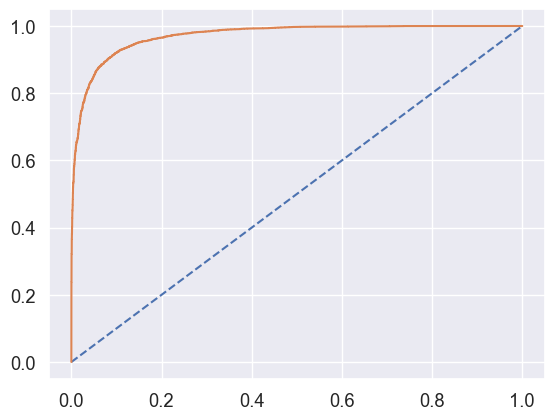

In [318]:
# Train Model Roc_AUC SCore
# predict probabilities
probs = gbcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [319]:
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9033635878270155
[[2565  250]
 [ 293 2511]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      2815
           1       0.91      0.90      0.90      2804

    accuracy                           0.90      5619
   macro avg       0.90      0.90      0.90      5619
weighted avg       0.90      0.90      0.90      5619



AUC: 0.963


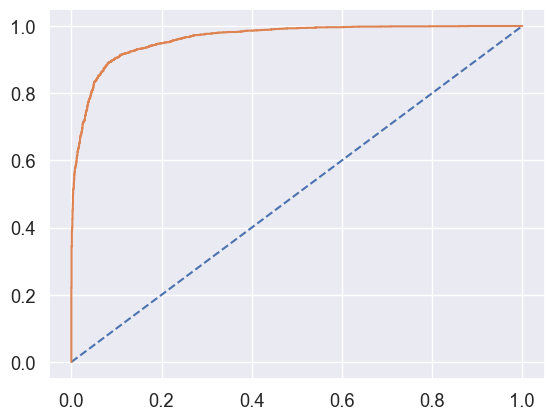

In [320]:
# Test Model Roc_AUC SCore
# predict probabilities
probs = gbcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

**SMOTE is only applied on the train data set**

In [321]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [322]:
## Let's check the shape after SMOTE
X_train_res.shape


(13120, 30)

## Naive Bayes with SMOTE

In [323]:
NB_SM_model = GaussianNB()
NB_SM_model.fit(X_train_res, y_train_res)

GaussianNB()

In [324]:
## Performance Matrix on train data set with SMOTE
y_train_predict = NB_SM_model.predict(X_train_res)
model_score = NB_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res ,y_train_predict))

0.556935975609756
[[1036 5524]
 [ 289 6271]]
              precision    recall  f1-score   support

           0       0.78      0.16      0.26      6560
           1       0.53      0.96      0.68      6560

    accuracy                           0.56     13120
   macro avg       0.66      0.56      0.47     13120
weighted avg       0.66      0.56      0.47     13120



In [325]:
## Performance Matrix on test data set
y_test_predict = NB_SM_model.predict(X_test)
model_score = NB_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.5563267485317672
[[ 435 2380]
 [ 113 2691]]
              precision    recall  f1-score   support

           0       0.79      0.15      0.26      2815
           1       0.53      0.96      0.68      2804

    accuracy                           0.56      5619
   macro avg       0.66      0.56      0.47      5619
weighted avg       0.66      0.56      0.47      5619



## KNN With SMOTE

In [326]:
KNN_SM_model=KNeighborsClassifier()
KNN_SM_model.fit(X_train_res,y_train_res)

KNeighborsClassifier()

In [327]:
## Performance Matrix on train data set
y_train_predict = KNN_SM_model.predict(X_train_res)
model_score = KNN_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

0.9807164634146341
[[6313  247]
 [   6 6554]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      6560
           1       0.96      1.00      0.98      6560

    accuracy                           0.98     13120
   macro avg       0.98      0.98      0.98     13120
weighted avg       0.98      0.98      0.98     13120



In [328]:
## Performance Matrix on test data set
y_test_predict = KNN_SM_model.predict(X_test)
model_score = KNN_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9640505428012102
[[2621  194]
 [   8 2796]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      2815
           1       0.94      1.00      0.97      2804

    accuracy                           0.96      5619
   macro avg       0.97      0.96      0.96      5619
weighted avg       0.97      0.96      0.96      5619



Recall for Class 1


                        Train Data Set                  Test Data Set

Naive Bayes                .96                           .96
KNN                       1.00                          1.00

Recall for Naive Bayes and KNN both is same for train and test dataset. However the accuracy is higher for KNN.

SMOTE as a technique is generally applied if minority class is below 5%. 

## Cross Validation on Naive Bayes Model

In [329]:
scores = cross_val_score(NB_SM_model, X_train_res, y_train_res, cv=10)
scores

array([0.55487805, 0.55030488, 0.55716463, 0.55716463, 0.54954268,
       0.55640244, 0.54878049, 0.55868902, 0.55411585, 0.57164634])

In [330]:
scores = cross_val_score(NB_SM_model, X_test, y_test, cv=10)
scores

array([0.56939502, 0.52669039, 0.56761566, 0.56049822, 0.54626335,
       0.53558719, 0.56939502, 0.52846975, 0.53558719, 0.57219251])

#### After 10 fold cross validation, scores both on train and test data set respectively for all 10 folds are almost same. 
#### Hence our model is valid.

## Cross Validation on KNN Model

In [331]:
scores = cross_val_score(KNN_SM_model, X_train_res, y_train_res, cv=10)
scores

array([0.94435976, 0.9527439 , 0.95960366, 0.95198171, 0.95655488,
       0.94664634, 0.96112805, 0.94740854, 0.96265244, 0.9535061 ])

In [332]:
scores = cross_val_score(KNN_SM_model, X_test, y_test, cv=10)
scores

array([0.90747331, 0.91814947, 0.89323843, 0.90035587, 0.90391459,
       0.9252669 , 0.92882562, 0.92348754, 0.886121  , 0.91800357])

#### After 10 fold cross validation, scores both on train and test data set respectively for all 10 folds are almost same. 
#### Hence our model is valid.